In [2]:

from json import load
from dotenv import load_dotenv
from helpers import *
import os

load_dotenv()

data_path = os.getenv('DATA_PATH')
ambient_dir = f'{data_path}/ambient' 
attack_dir = f'{data_path}/attacks'

ambient_metadata_file = os.path.join(ambient_dir, 'capture_metadata.json')
attack_metadata_file = os.path.join(attack_dir, 'capture_metadata.json')

with open(ambient_metadata_file) as f:
    ambient_metadata = load(f)

with open(attack_metadata_file) as f:
    attack_metadata = load(f)

ambient_keys = [
                "ambient_dyno_drive_benign_anomaly", 
                "ambient_dyno_drive_basic_long",
                "ambient_highway_street_driving_long",
                "ambient_dyno_reverse",
                "ambient_dyno_idle_radio_infotainment",
                "ambient_dyno_drive_radio_infotainment",
                "ambient_dyno_drive_winter",
                "ambient_dyno_exercise_all_bits",
                "ambient_dyno_drive_extended_short",
                "ambient_dyno_drive_basic_short",
                "ambient_dyno_drive_extended_long",
                "ambient_highway_street_driving_diagnostics"
]

attack_keys = [
                "accelerator_attack_reverse_1",
                "accelerator_attack_drive_1",
                "accelerator_attack_drive_2",
                "accelerator_attack_reverse_2",
                "fuzzing_attack_1",
                "fuzzing_attack_2",
                "fuzzing_attack_3",
                "correlated_signal_attack_1",
                "correlated_signal_attack_2",
                "correlated_signal_attack_3",
                "reverse_light_on_attack_1",
                "reverse_light_on_attack_2",
                "reverse_light_on_attack_3",
                "reverse_light_off_attack_1",
                "reverse_light_off_attack_2",
                "reverse_light_off_attack_3",
                "max_speedometer_attack_1",
                "max_speedometer_attack_2",
                "max_speedometer_attack_3",
                "max_engine_coolant_temp_attack",
]

# load parquet files into dataframes
ambient_dfs = {}
for parquet_file in ambient_keys:
    parquet_filepath = os.path.join(ambient_dir, f'{parquet_file}.parquet')
    df = pd.read_parquet(parquet_filepath)
    df = add_time_diff_per_aid_col(df, True)
    df = add_time_diff_since_last_msg_col(df, True)
    ambient_dfs[parquet_file] = df

attack_dfs = {}
for parquet_file in attack_keys:
    parquet_filepath = os.path.join(attack_dir, f'{parquet_file}.parquet')
    df = pd.read_parquet(parquet_filepath)
    df = add_time_diff_per_aid_col(df, True)
    df = add_time_diff_since_last_msg_col(df, True)
    
    attack_dfs[parquet_file] = df

In [3]:
attack_dfs['accelerator_attack_reverse_1']

time   aid              data  time_diffs  \
0        0.011058   852  1FFF40000003D480    0.011058   
1        0.011059  1505  893FE0070A000080    0.010068   
2        0.011061   167  00510BA5412A00A0    0.010068   
3        0.012078  1760  0000000000000000    0.008067   
4        0.012079    14  205456020809738C    0.010085   
...           ...   ...               ...         ...   
189618  86.128500   167  0090FA24D12B70A0    0.005049   
189619  86.128501   458  3FF1FF8000000C68    0.100009   
189620  86.128502   208  5A730460F1000000    0.008114   
189621  86.129481    51  000788000EC007D0    0.008112   
189622  86.129482   293  9000441F3FBE6B60    0.007059   

        time_diff_since_last_msg  
0                            NaN  
1                   9.536743e-07  
2                   1.907349e-06  
3                   1.017094e-03  
4                   9.536743e-07  
...                          ...  
189618              9.536743e-07  
189619              9.536743e-07  
189620              1.192093e-06  
189621              9.789467e-04  
189622              9.536743e-07  

[189623 rows x 5 columns]

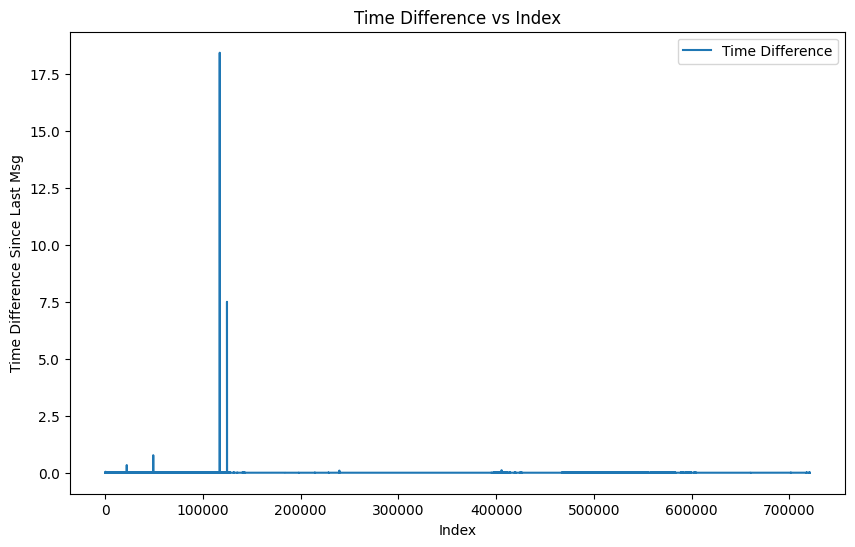

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_84785/2502897140.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


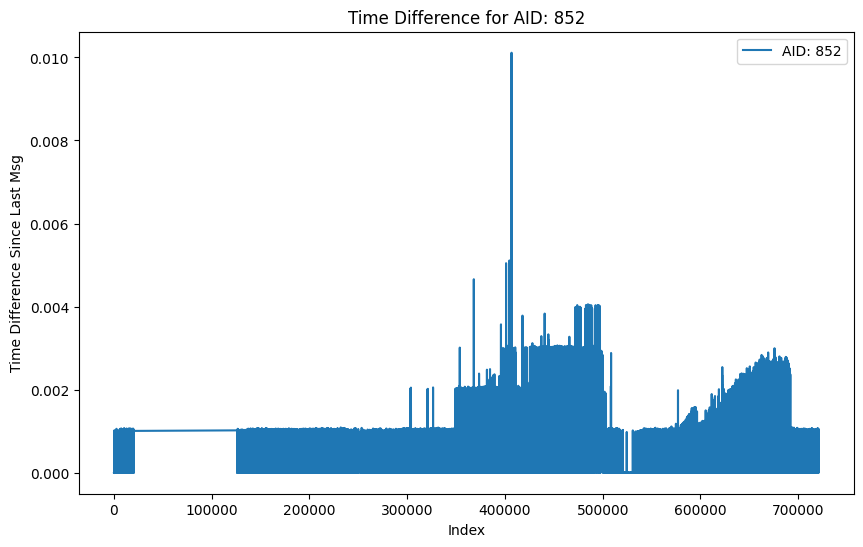

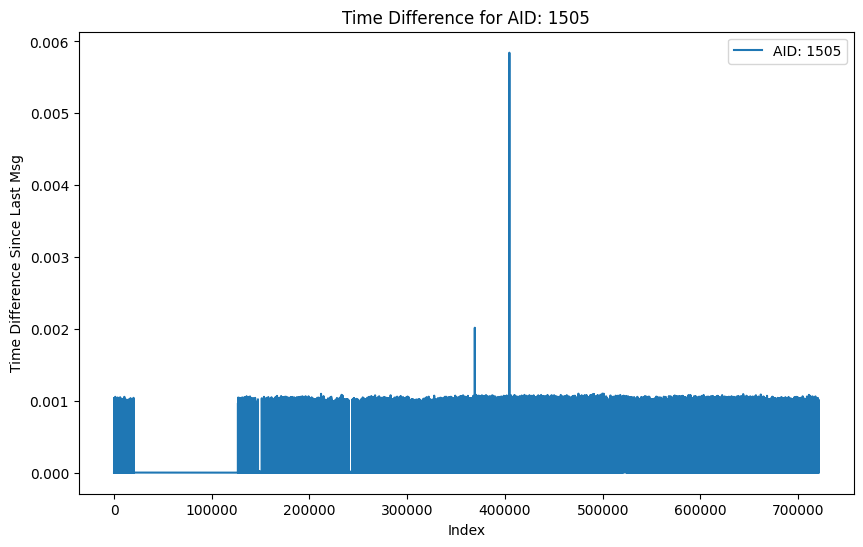

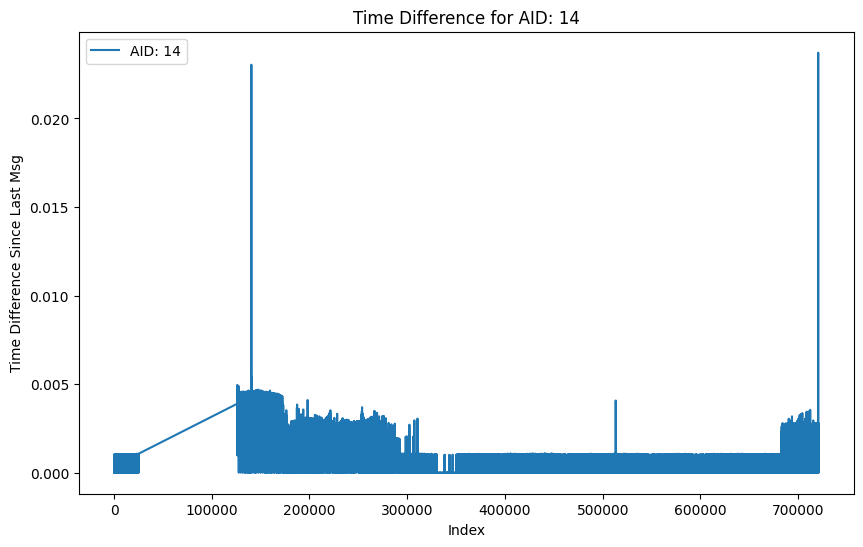

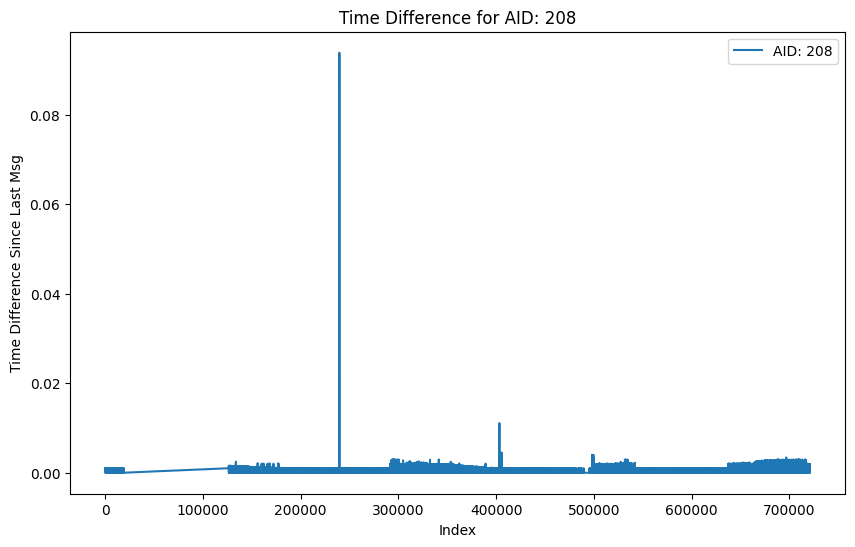

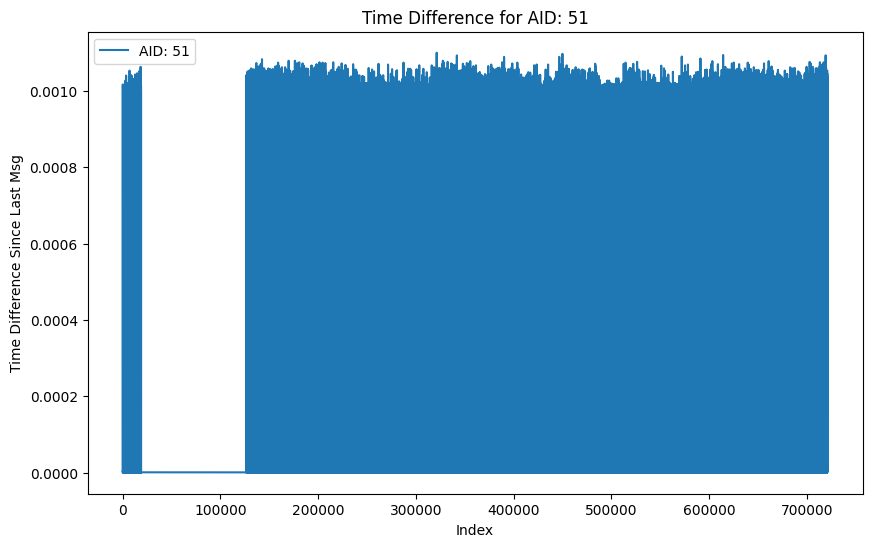

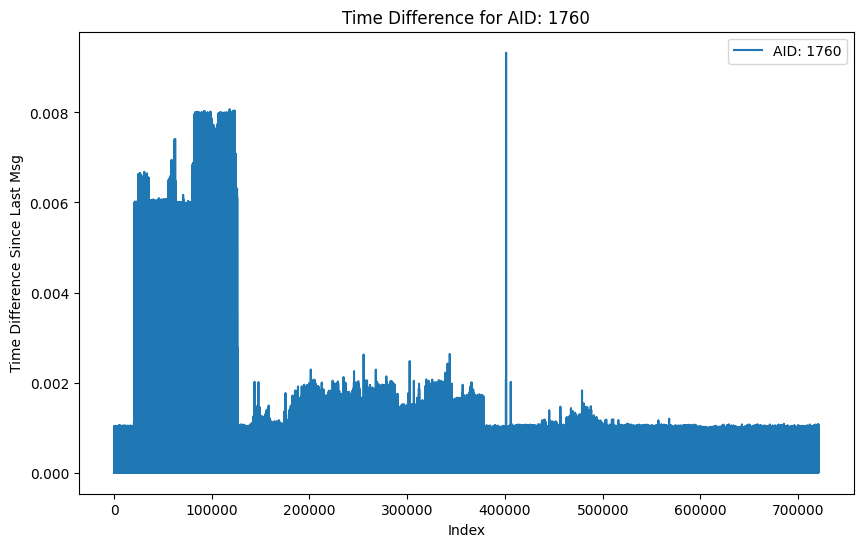

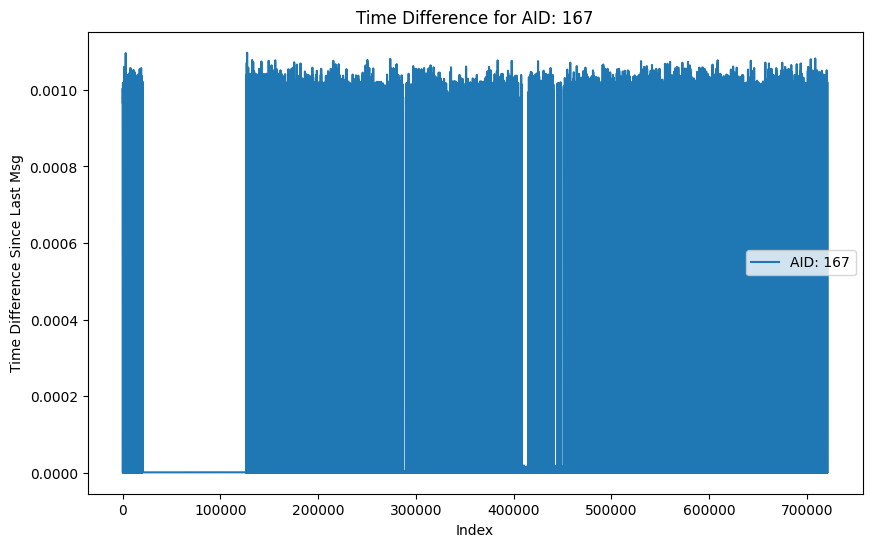

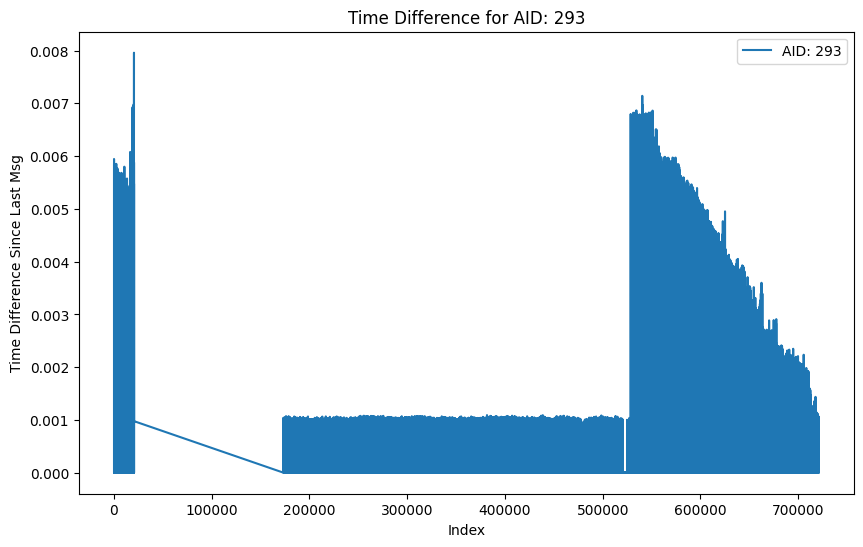

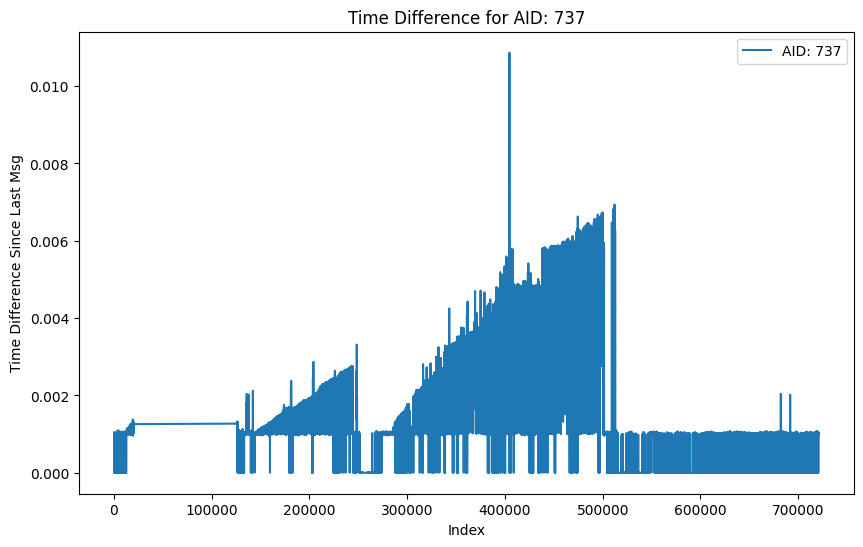

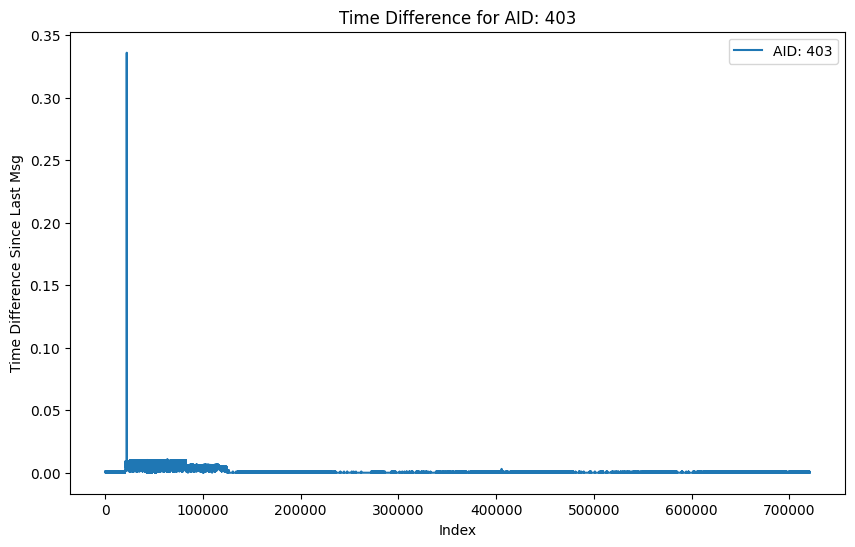

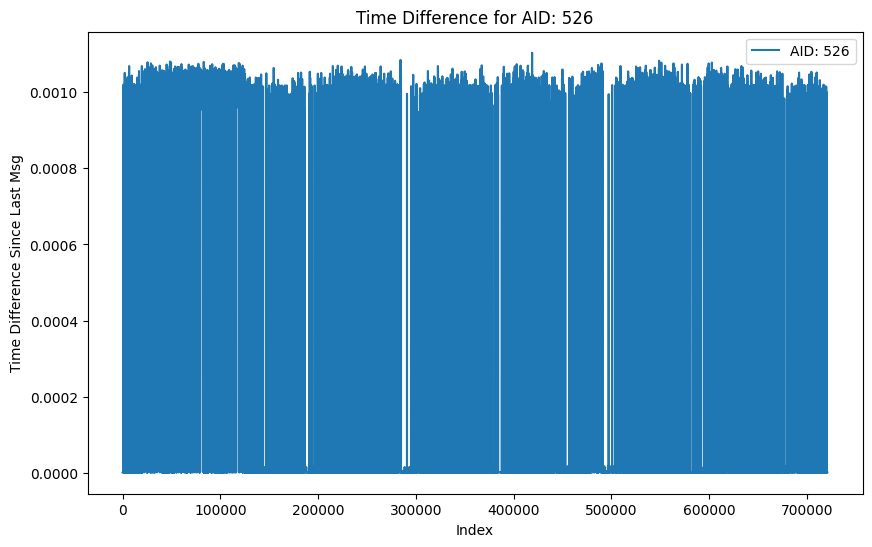

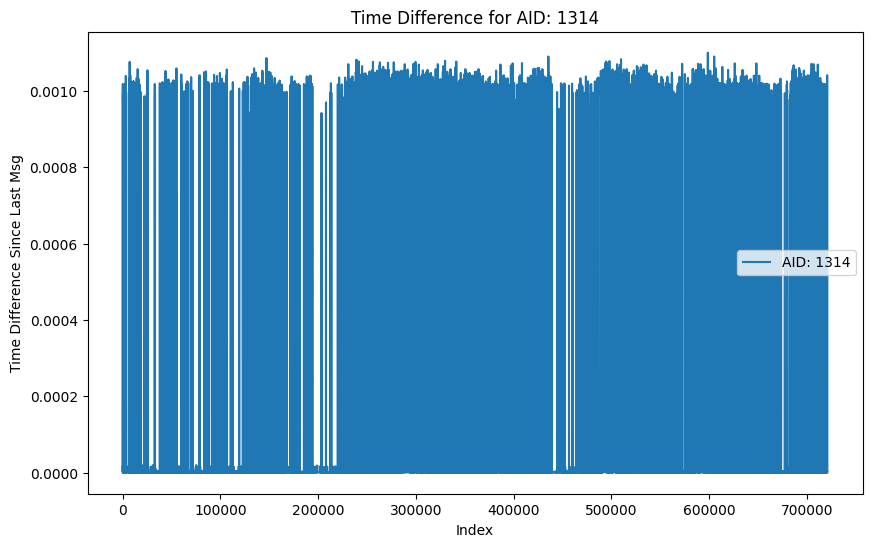

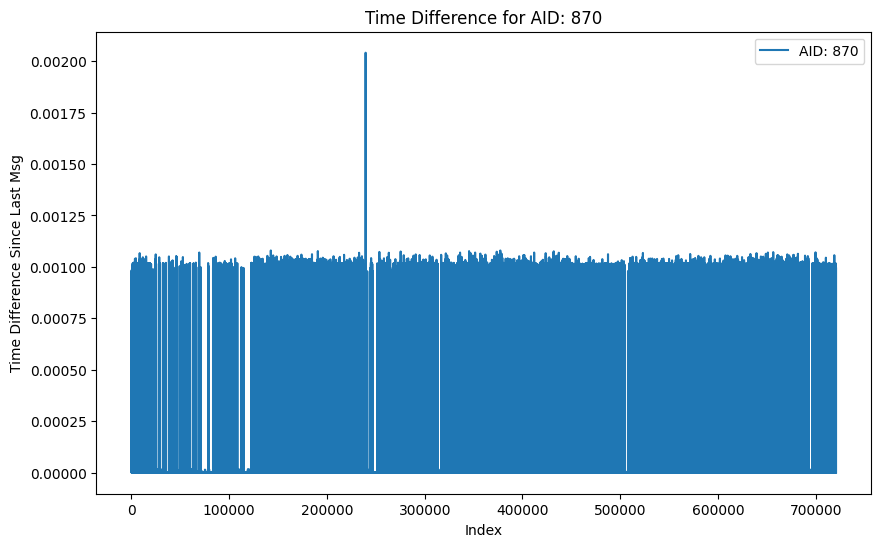

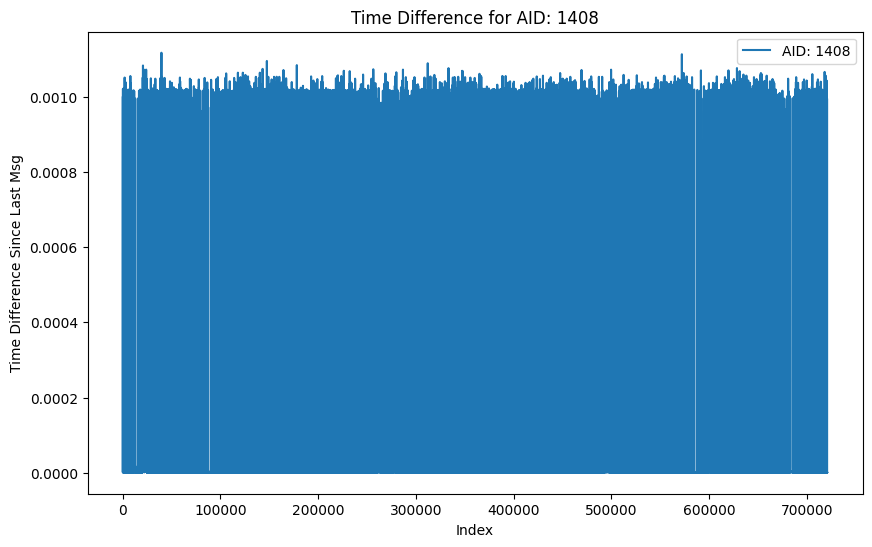

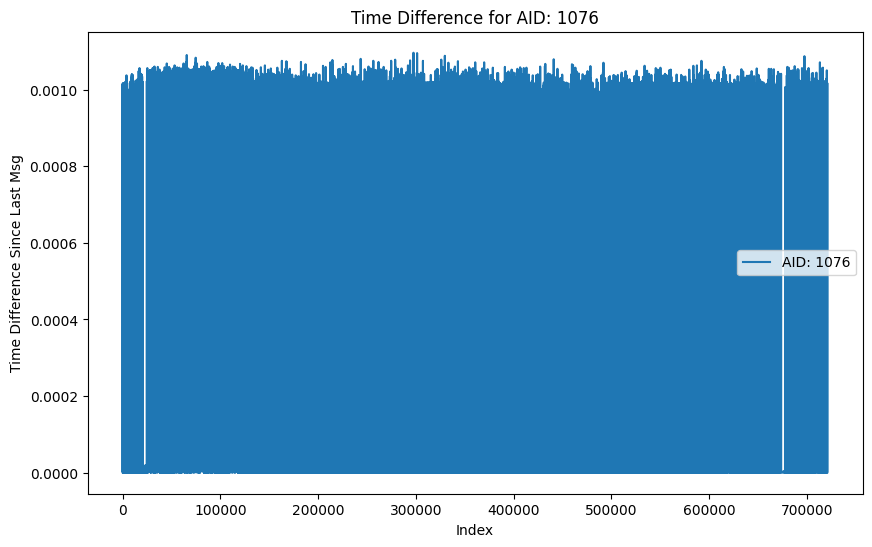

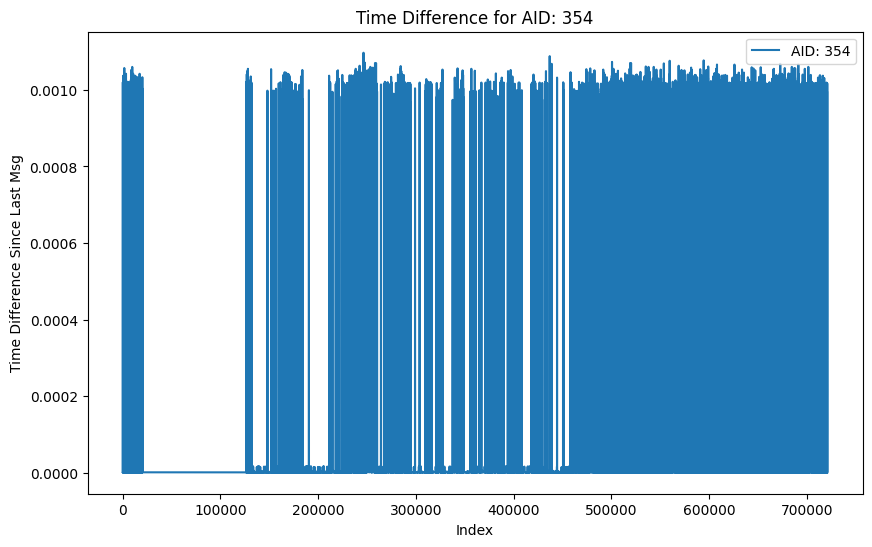

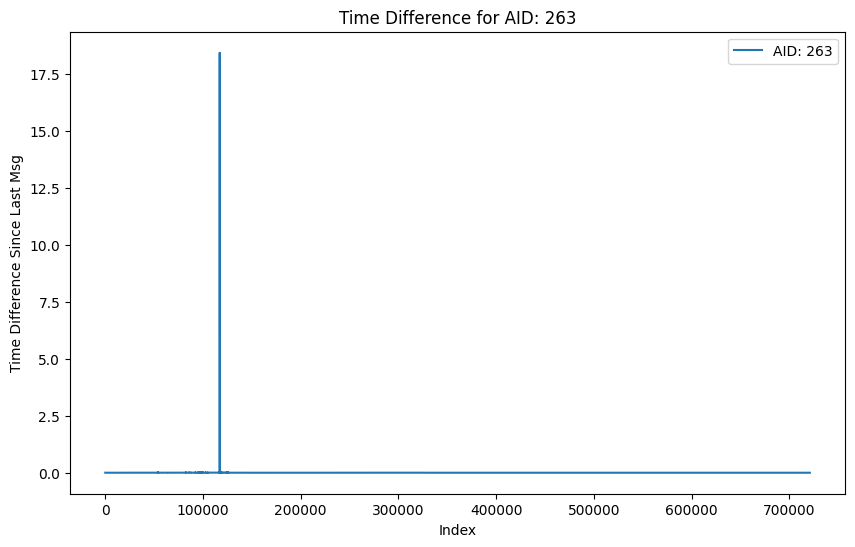

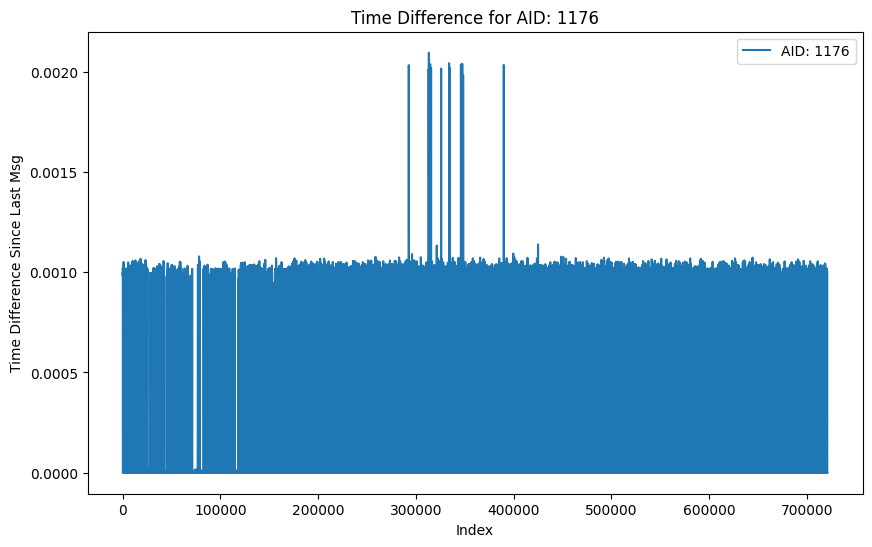

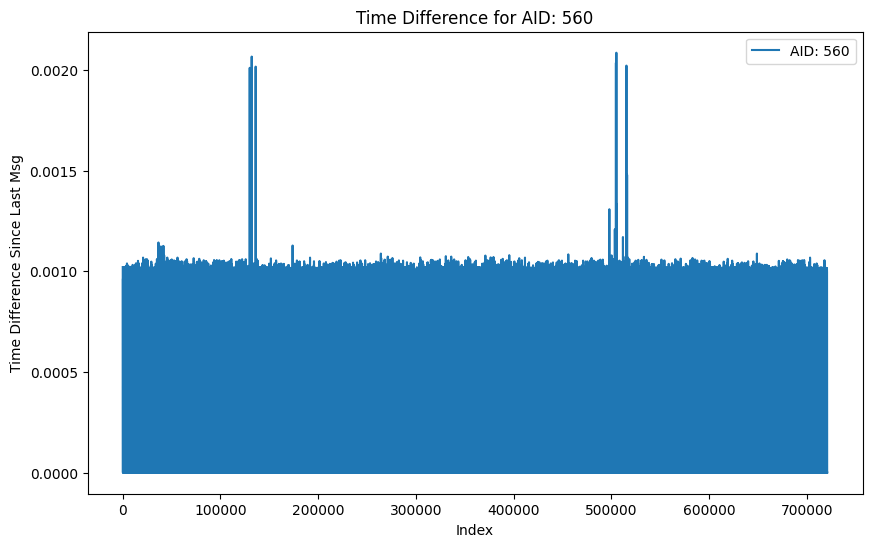

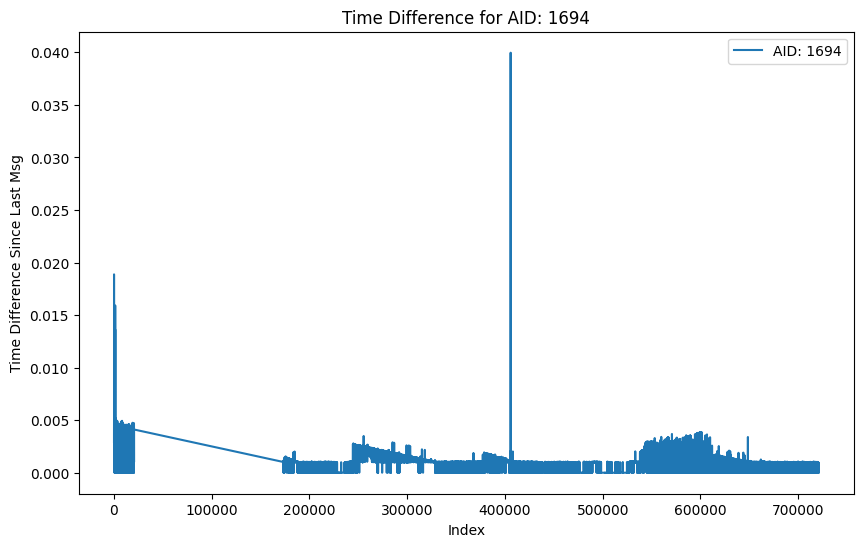

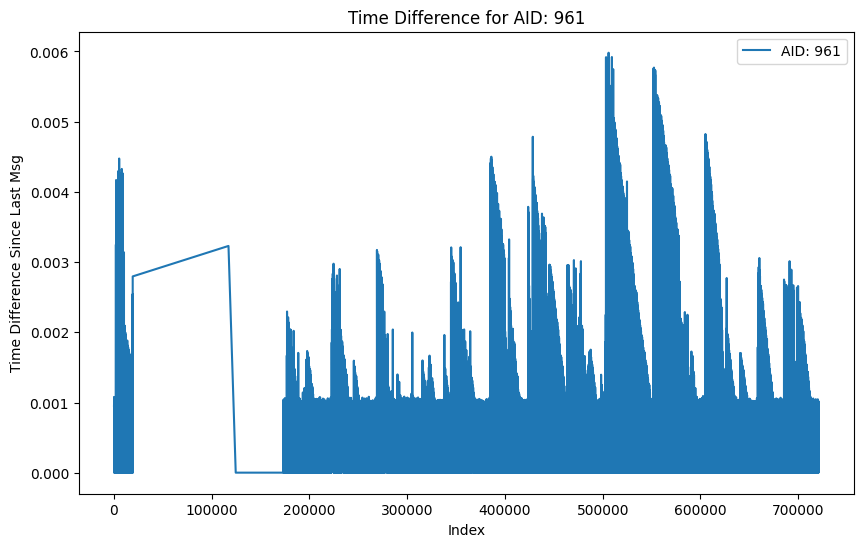

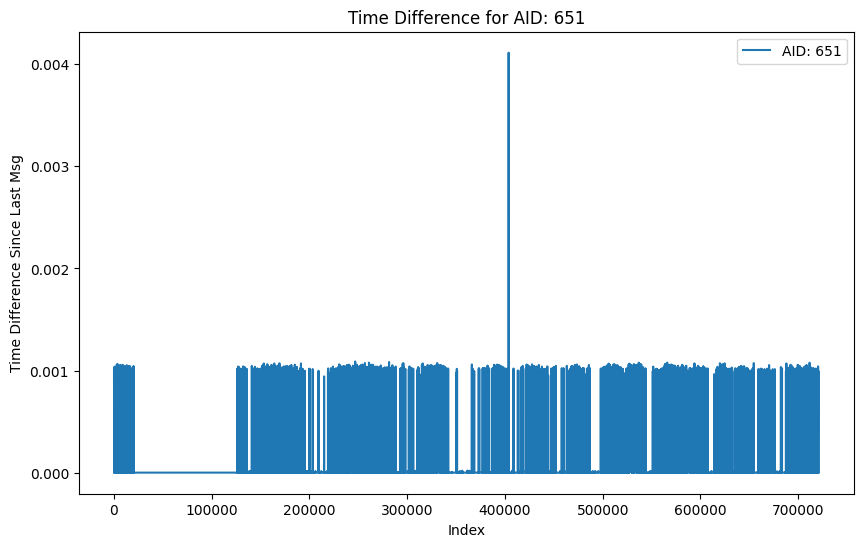

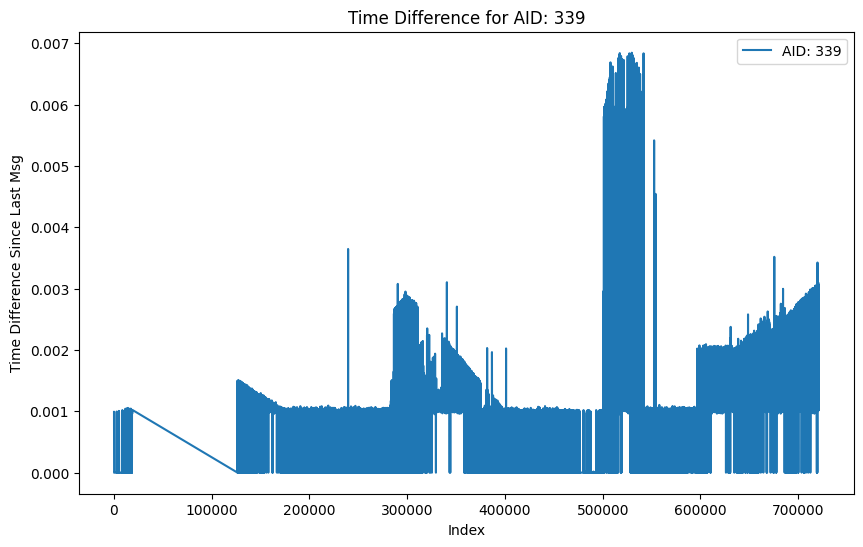

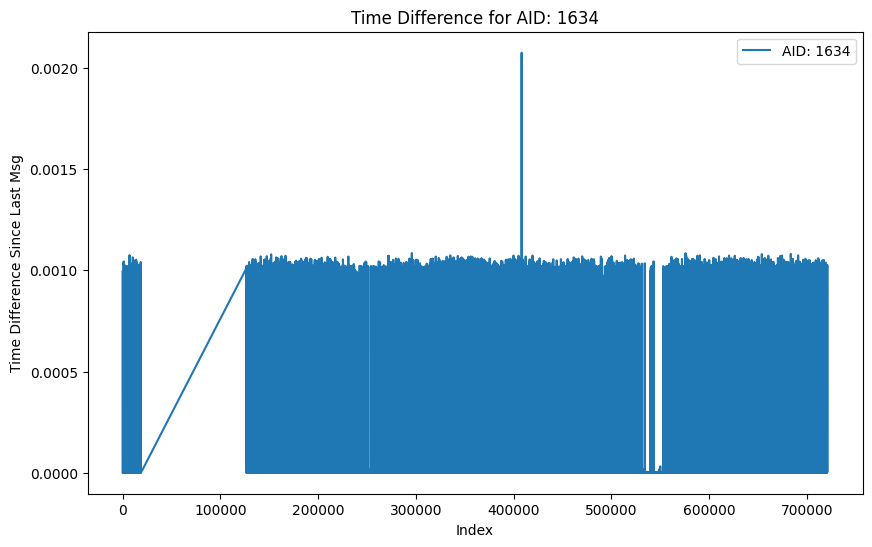

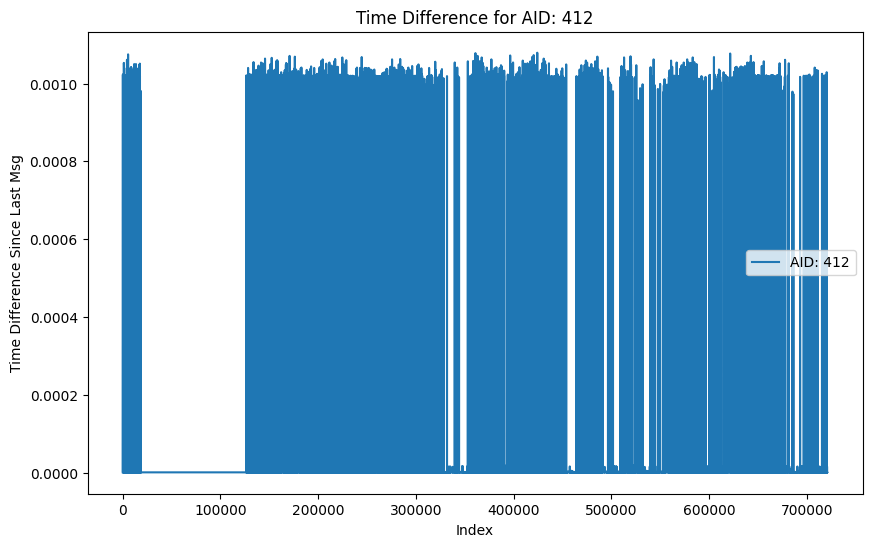

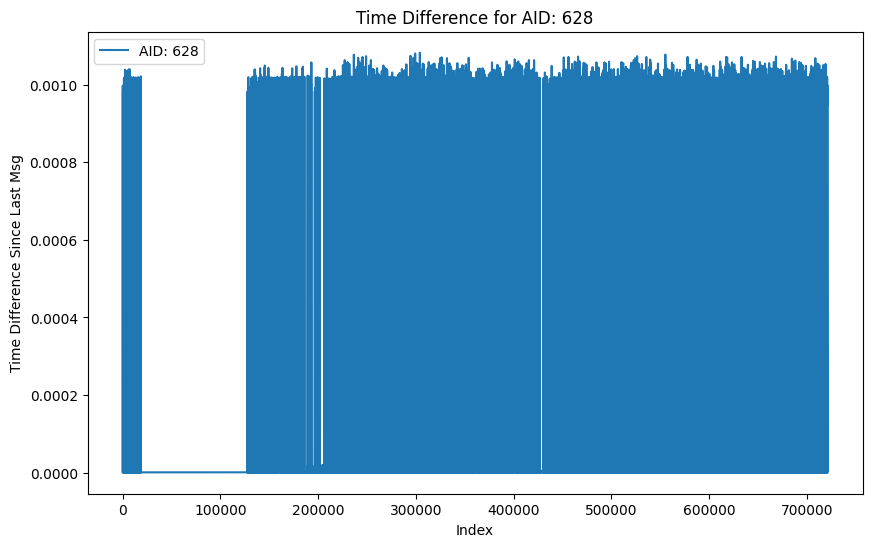

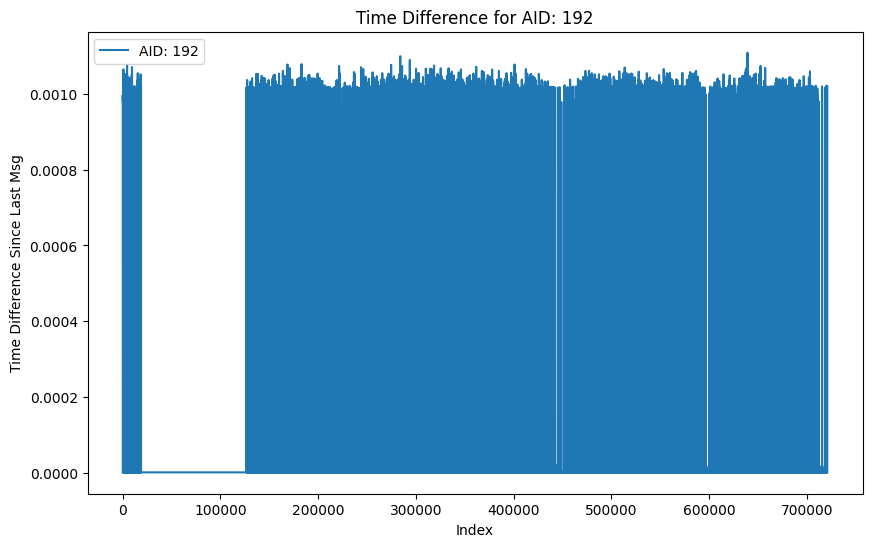

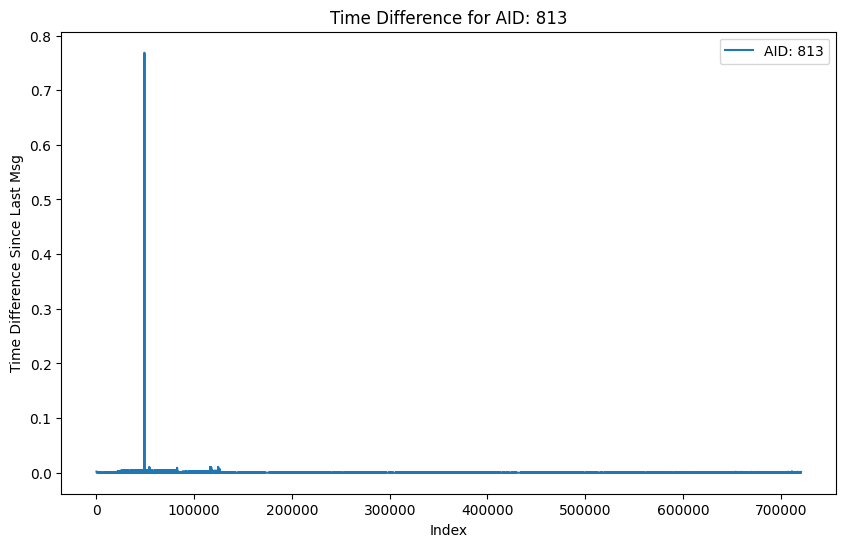

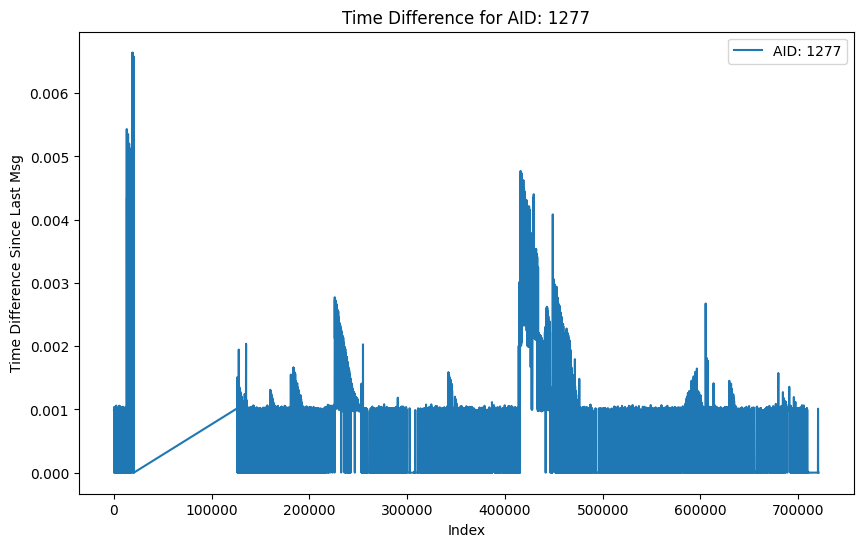

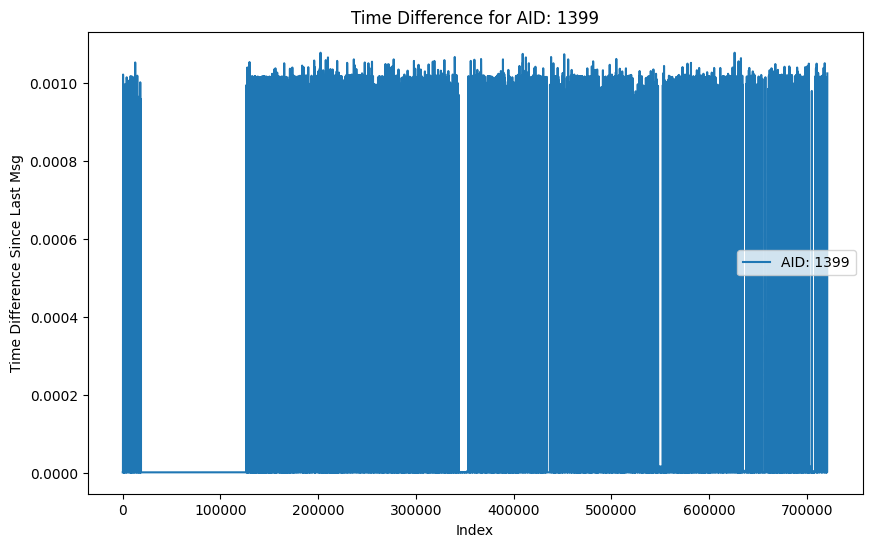

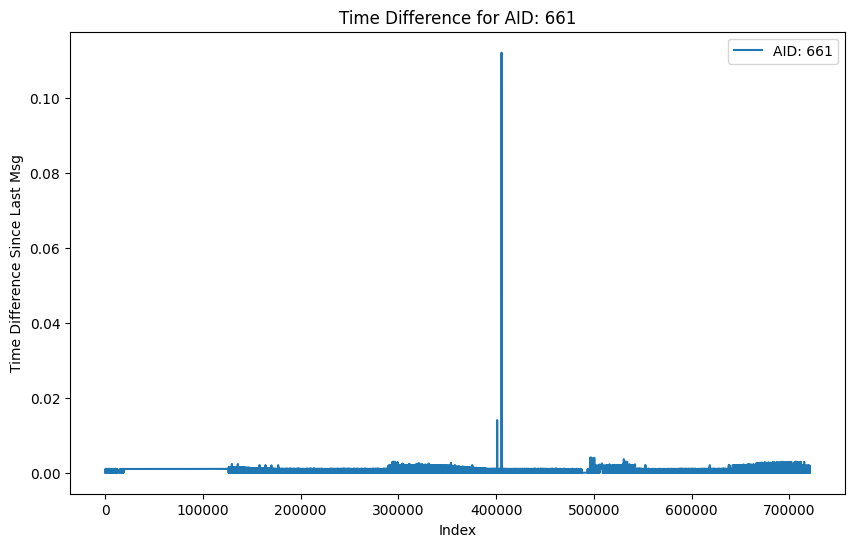

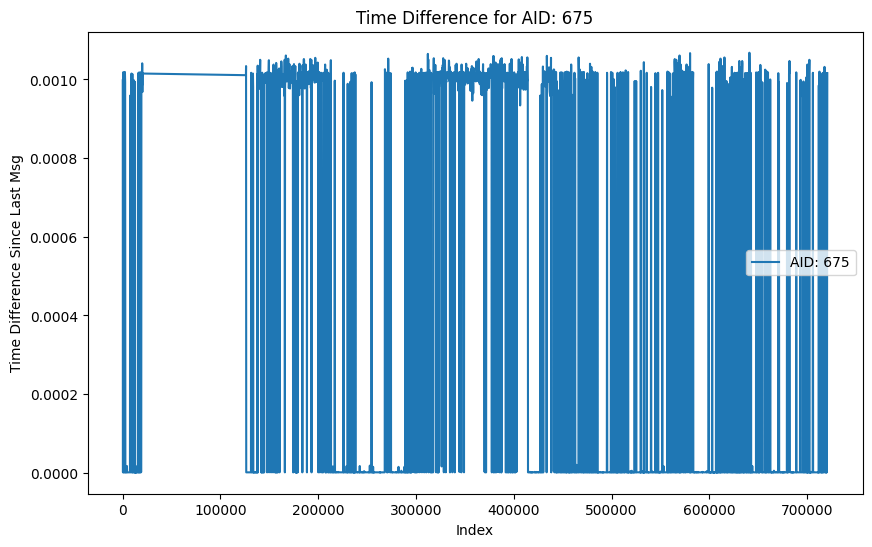

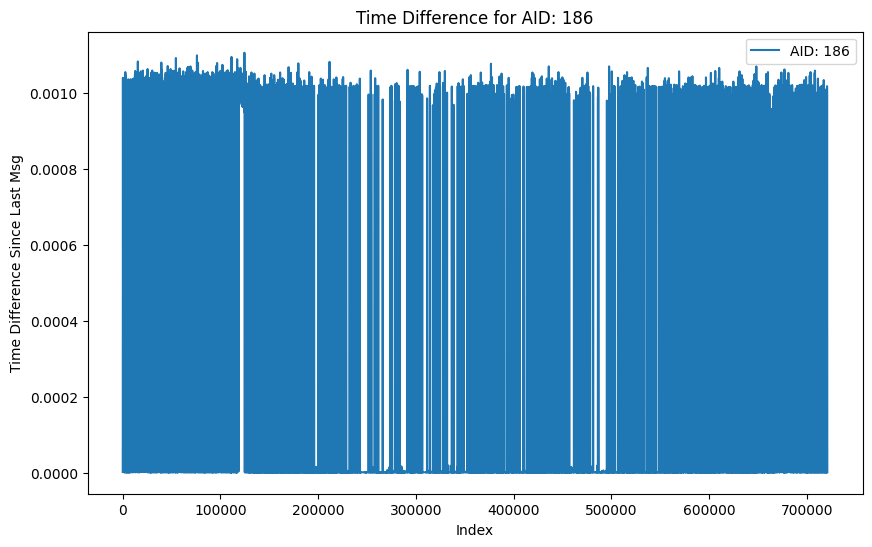

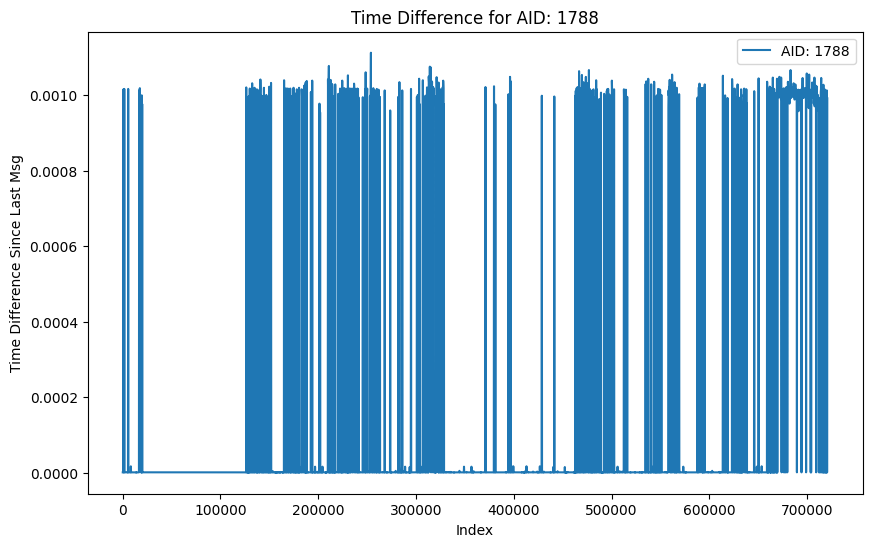

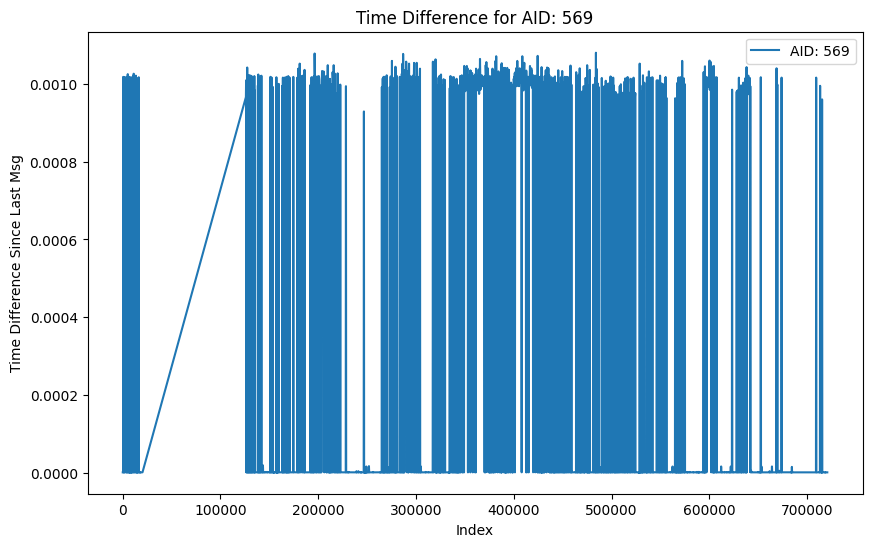

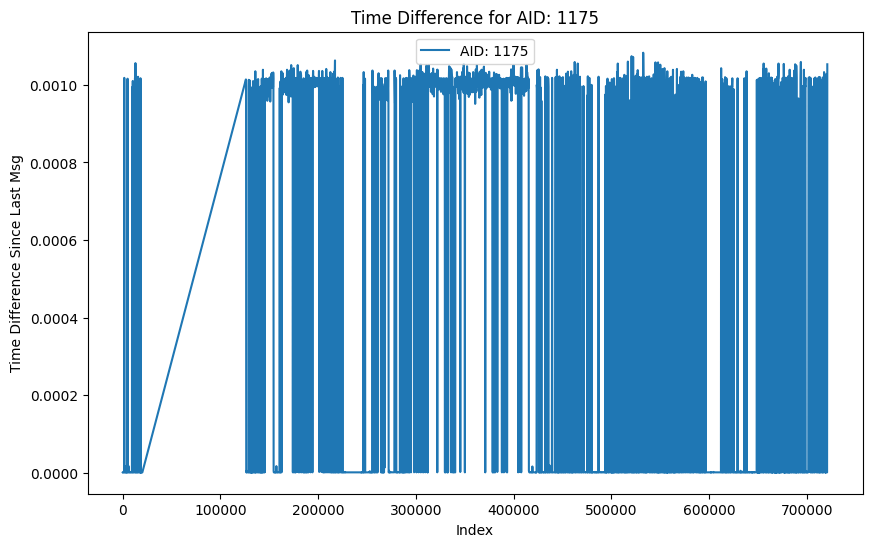

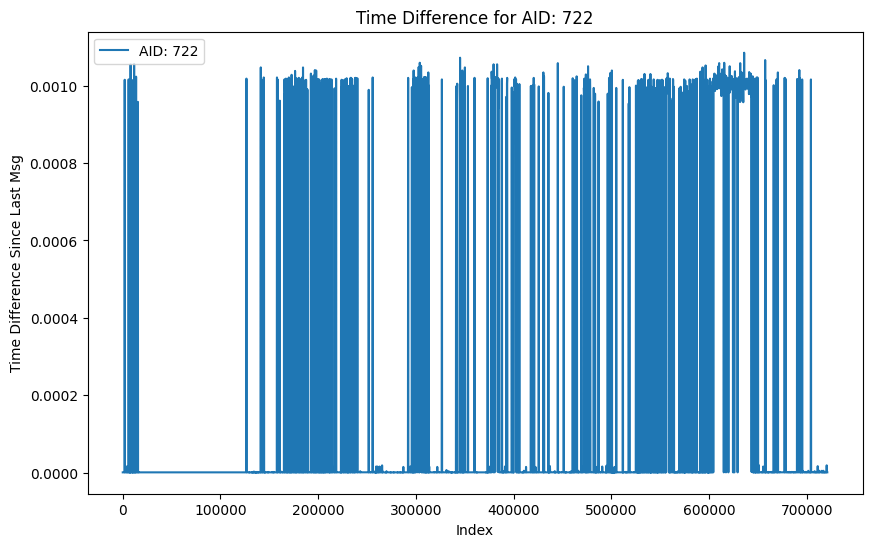

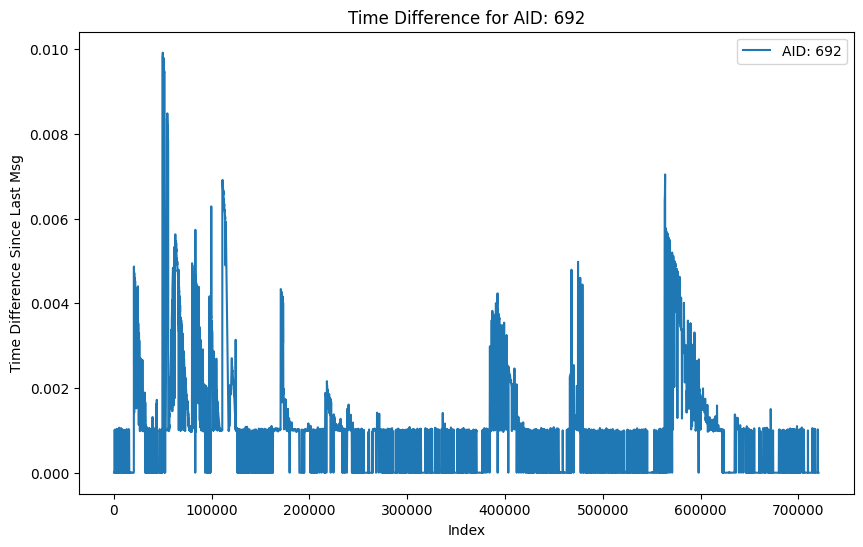

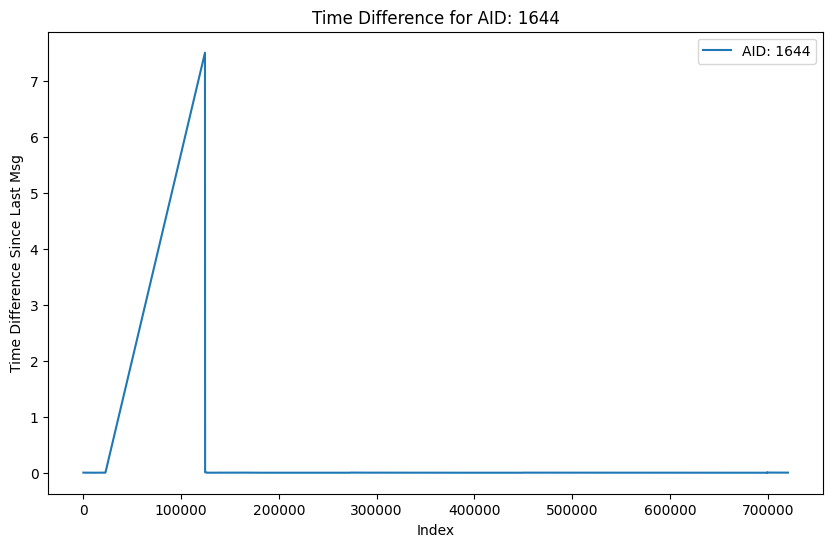

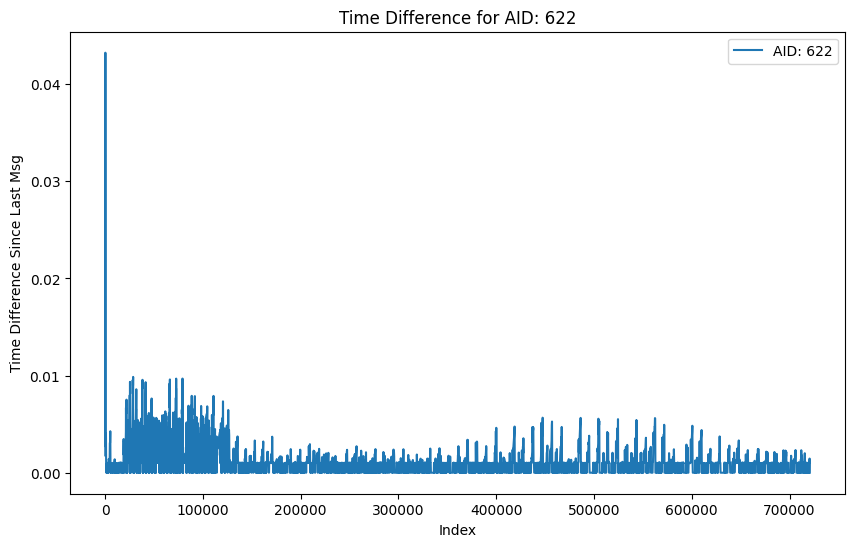

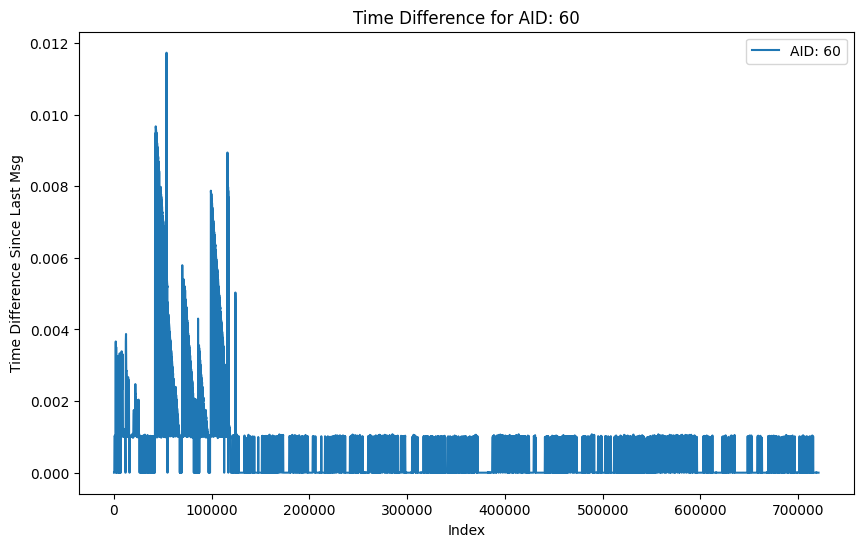

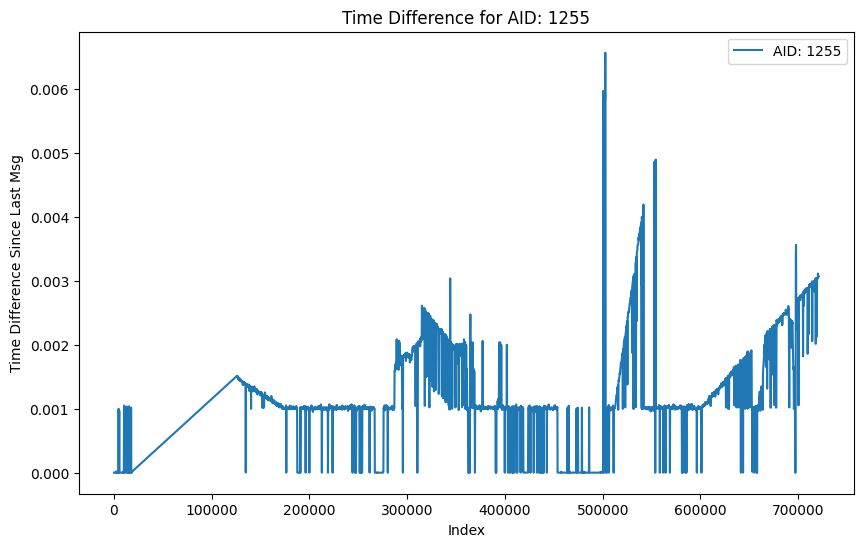

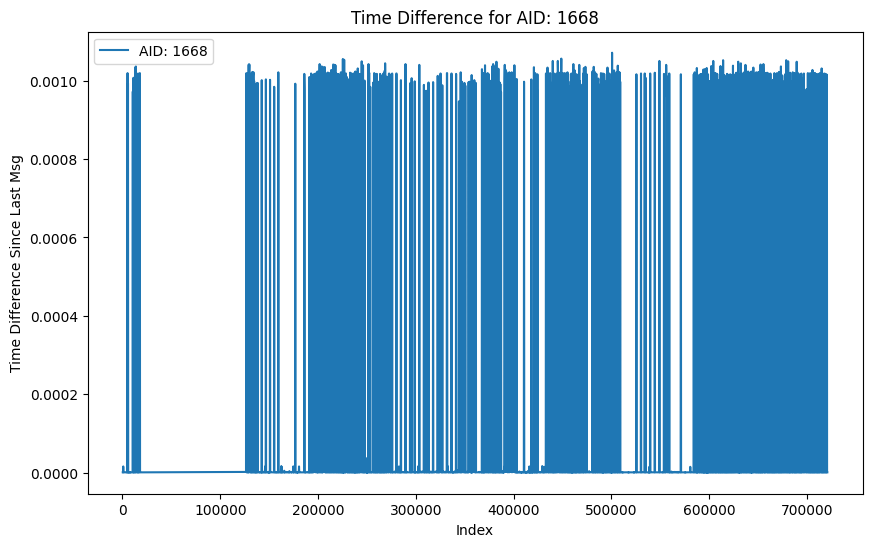

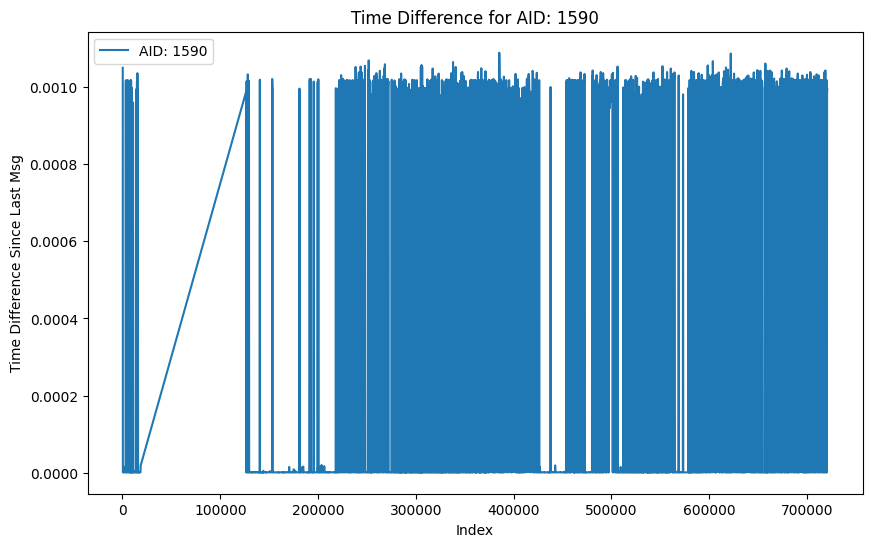

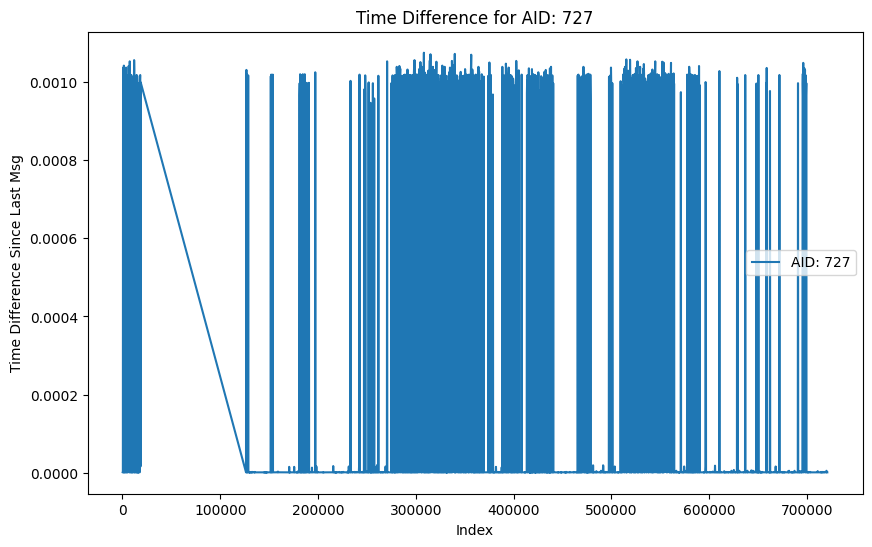

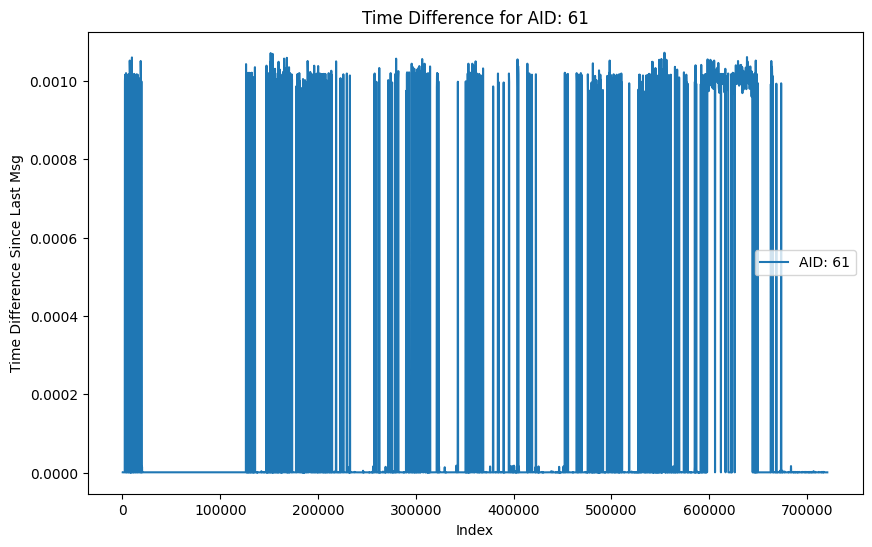

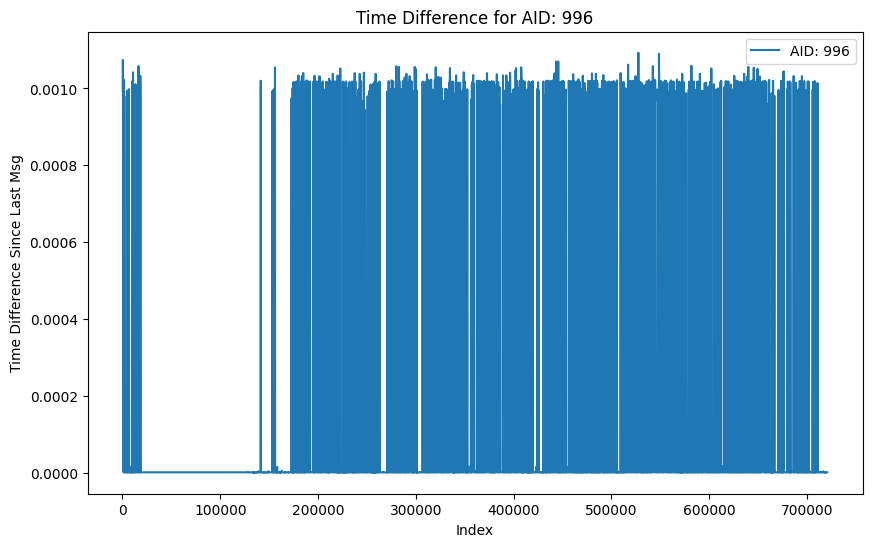

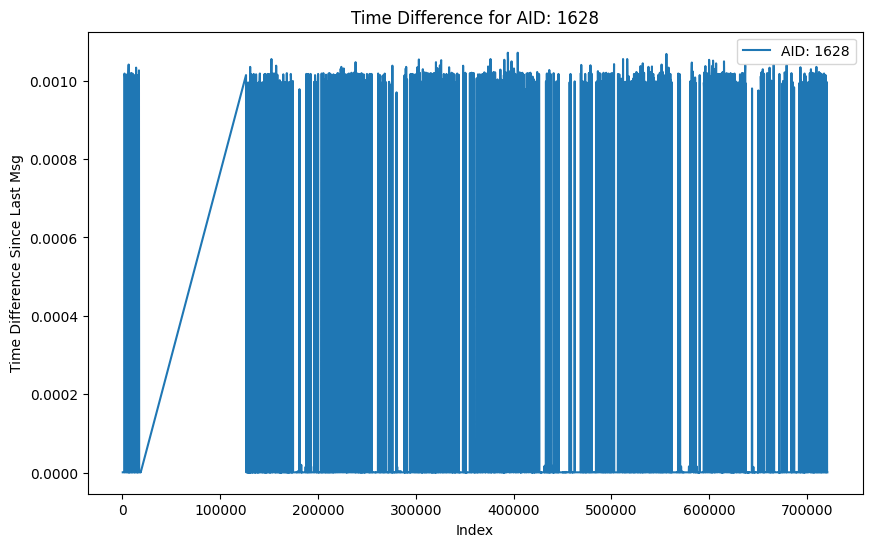

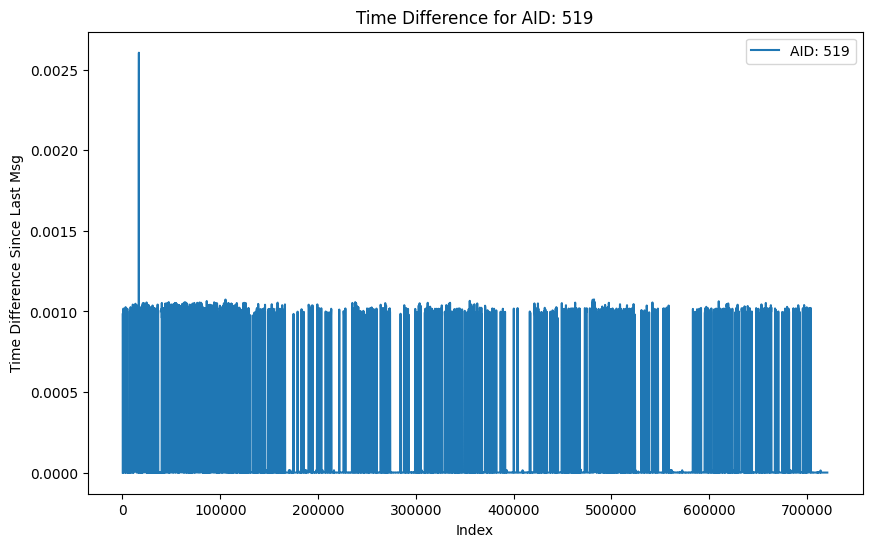

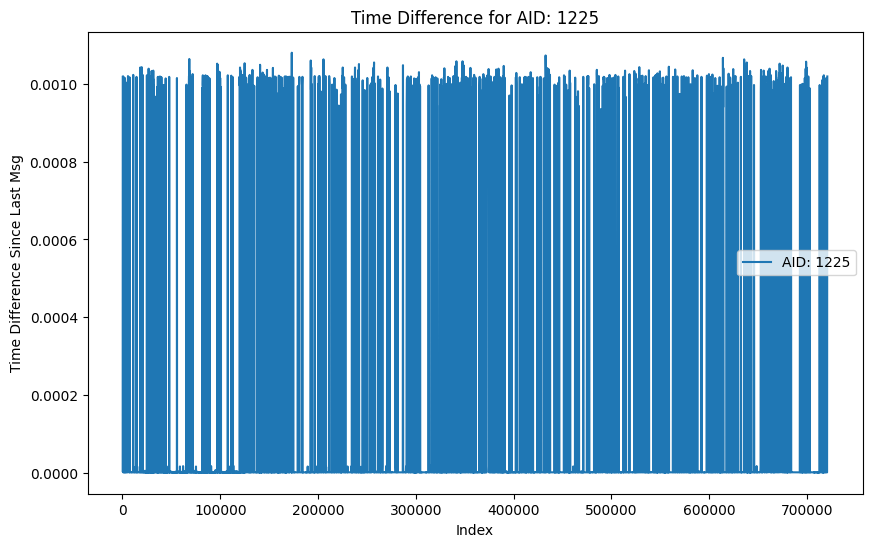

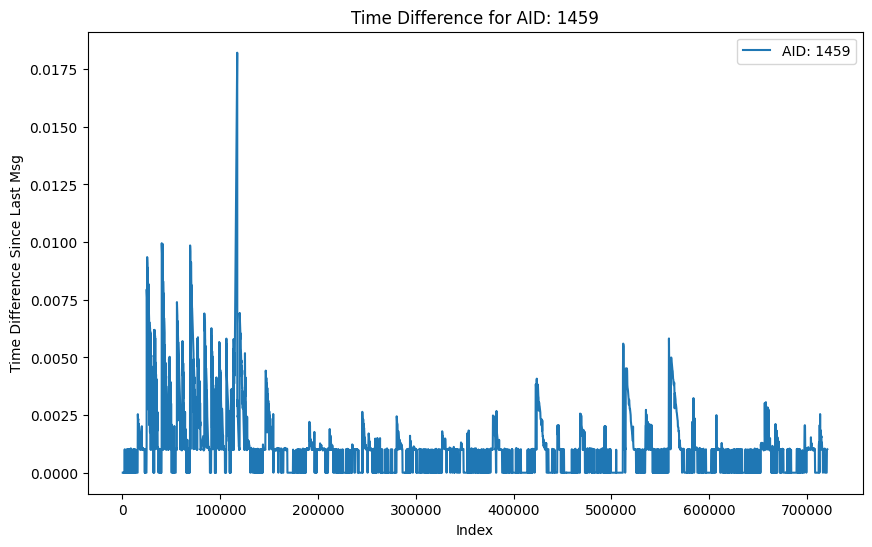

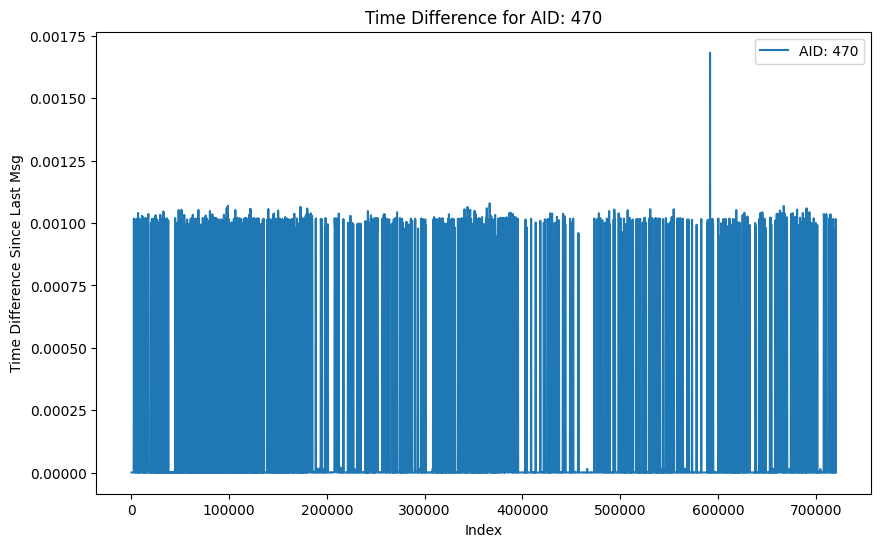

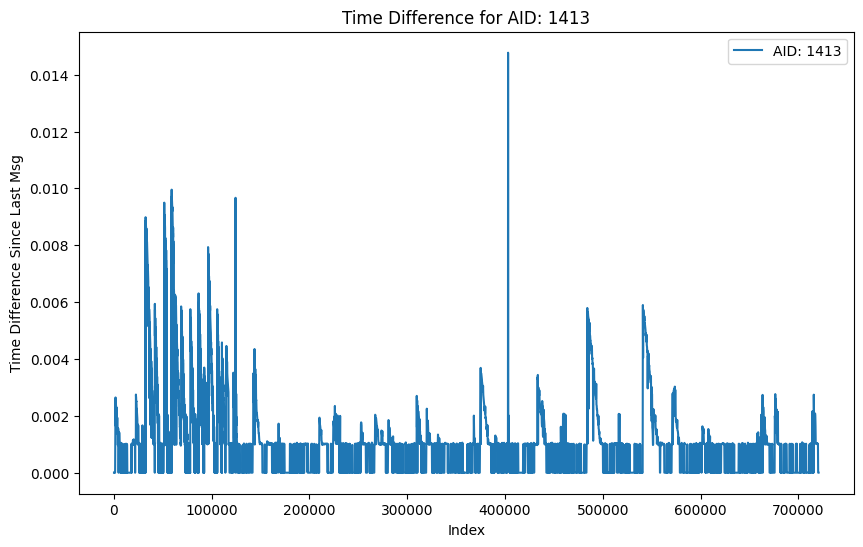

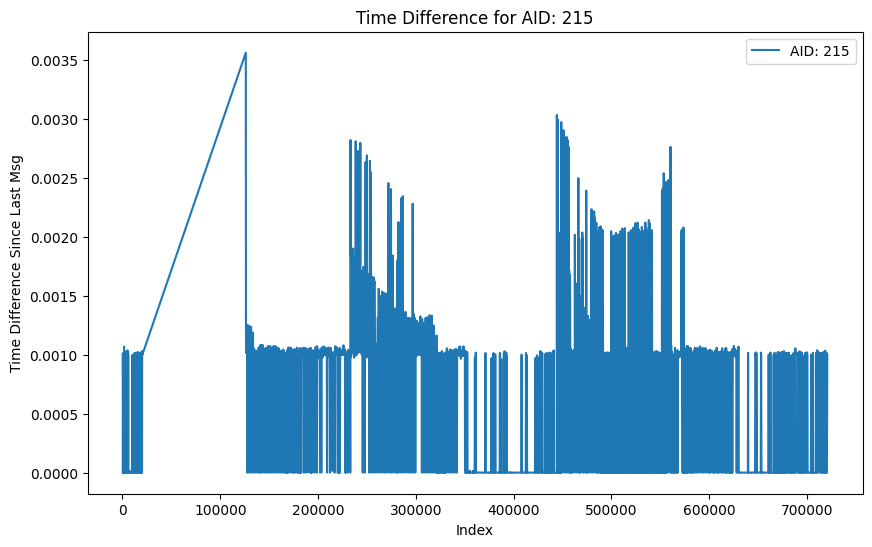

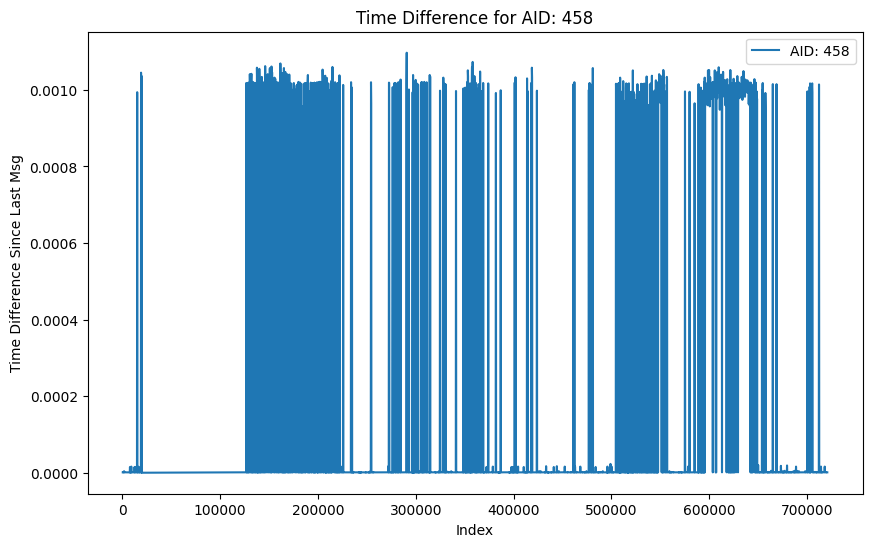

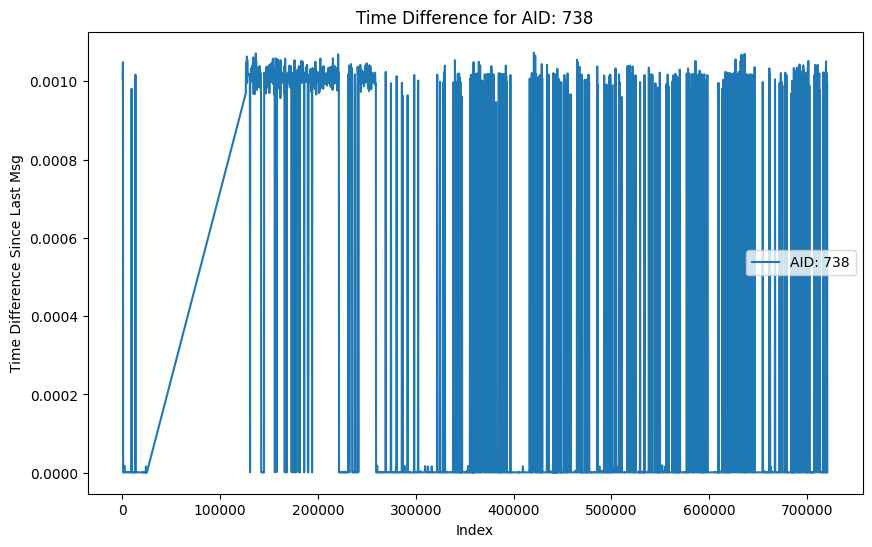

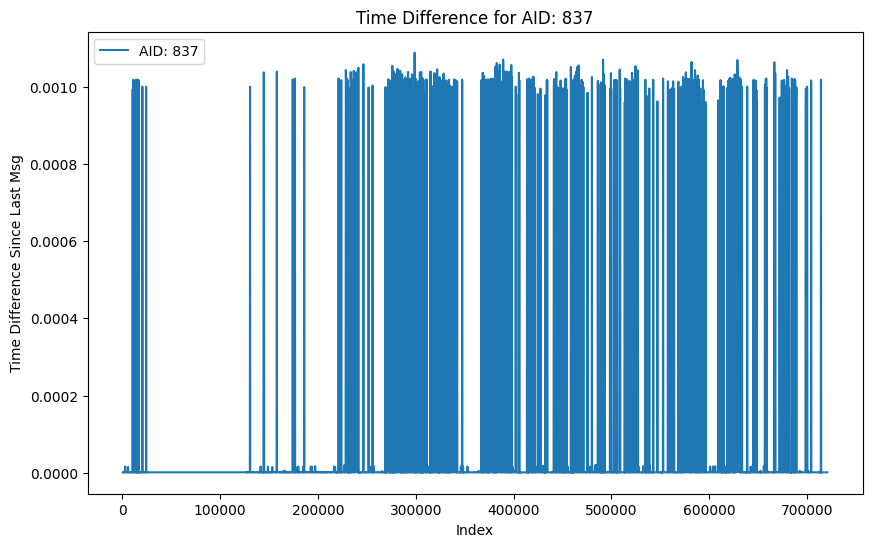

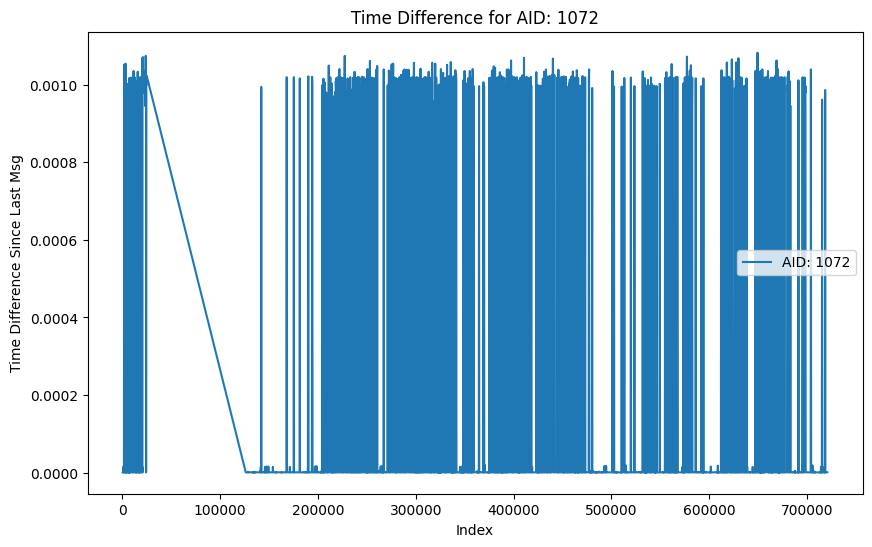

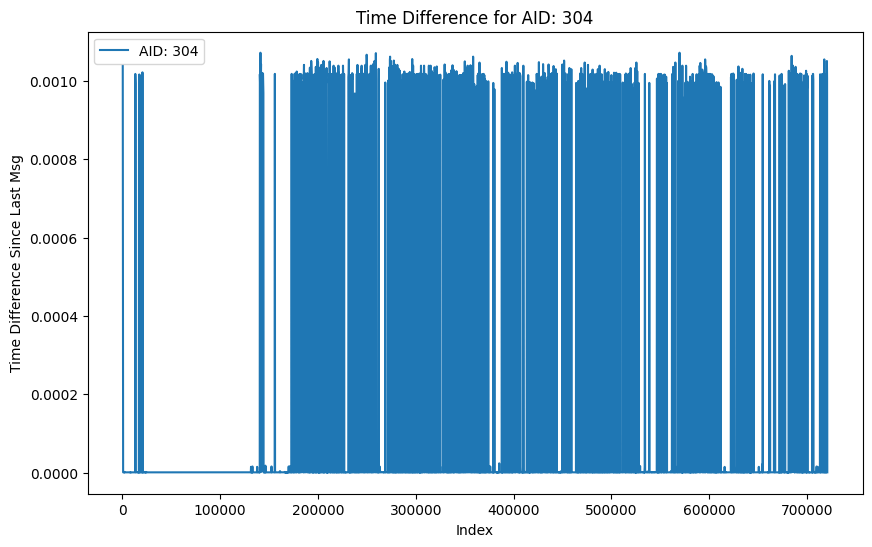

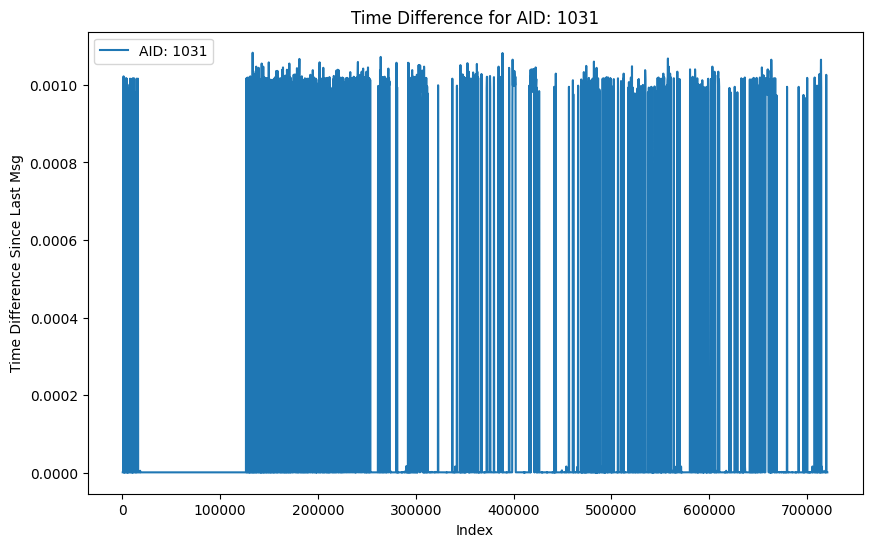

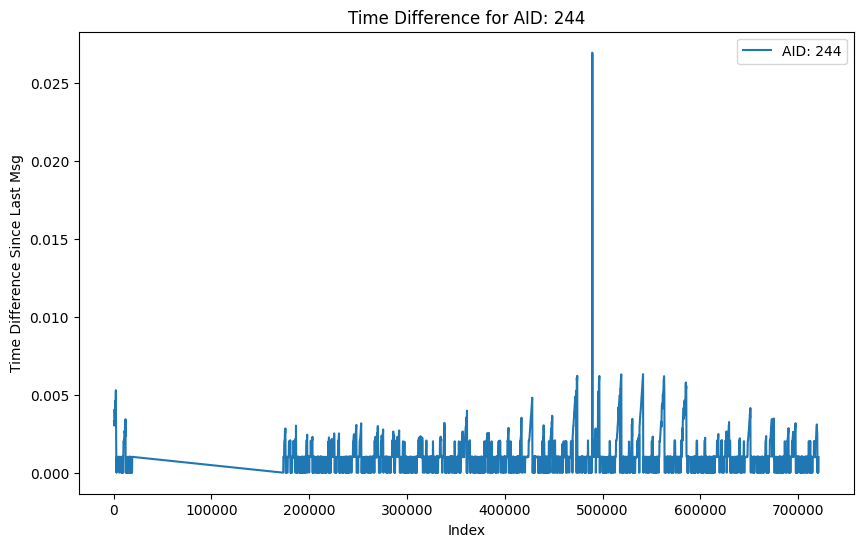

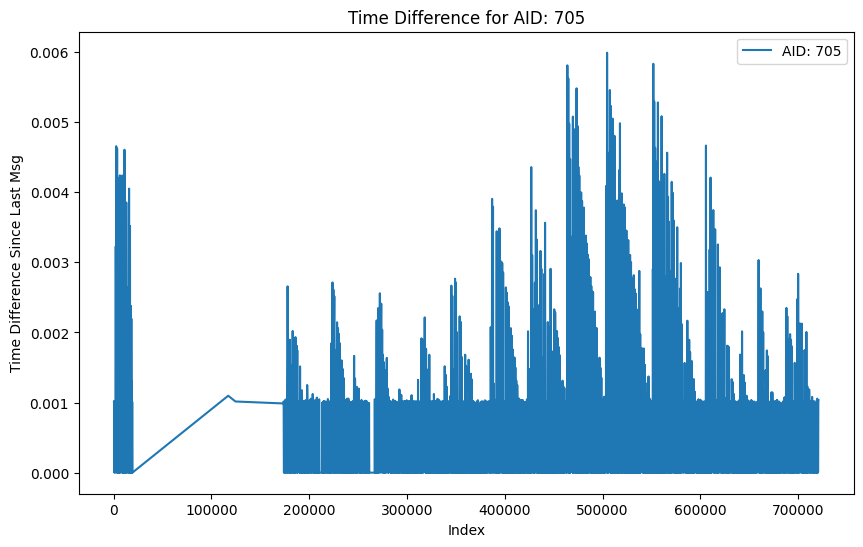

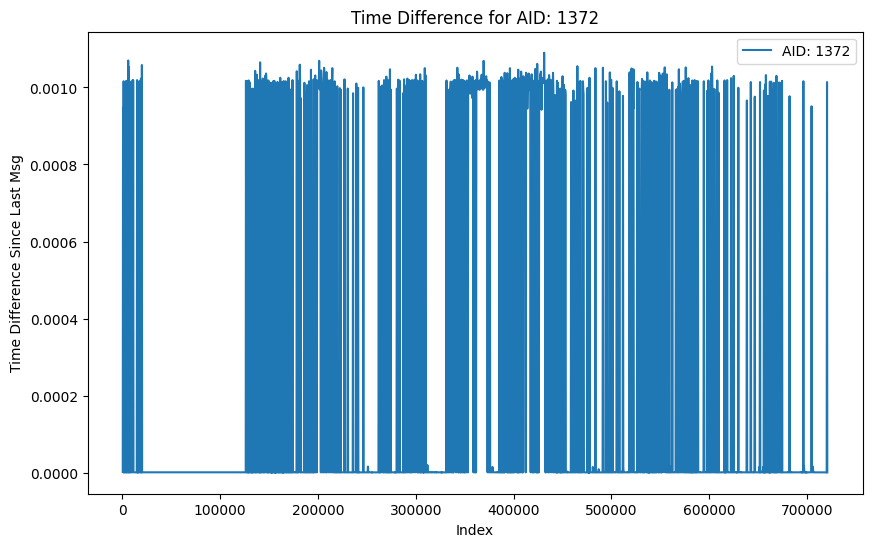

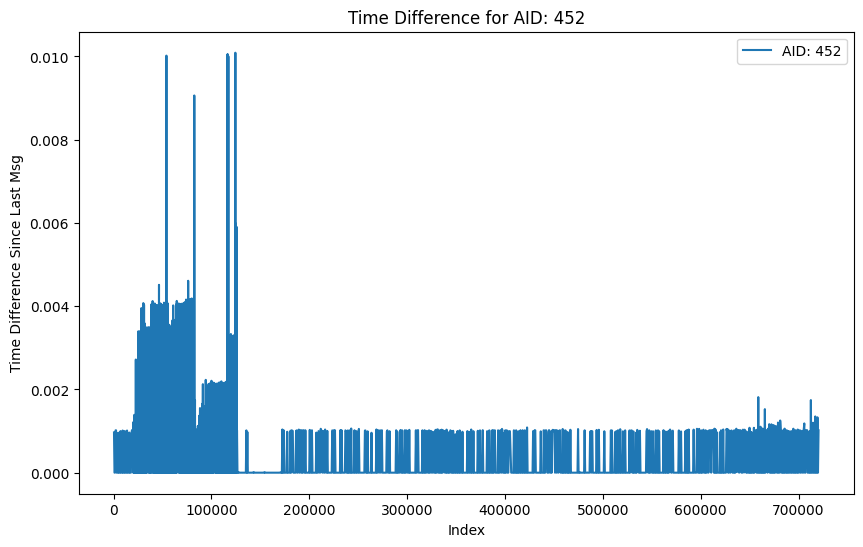

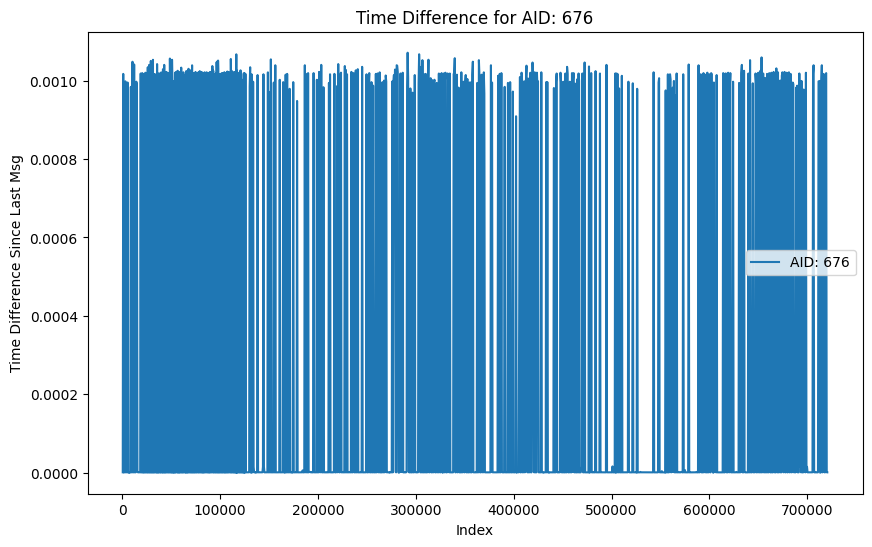

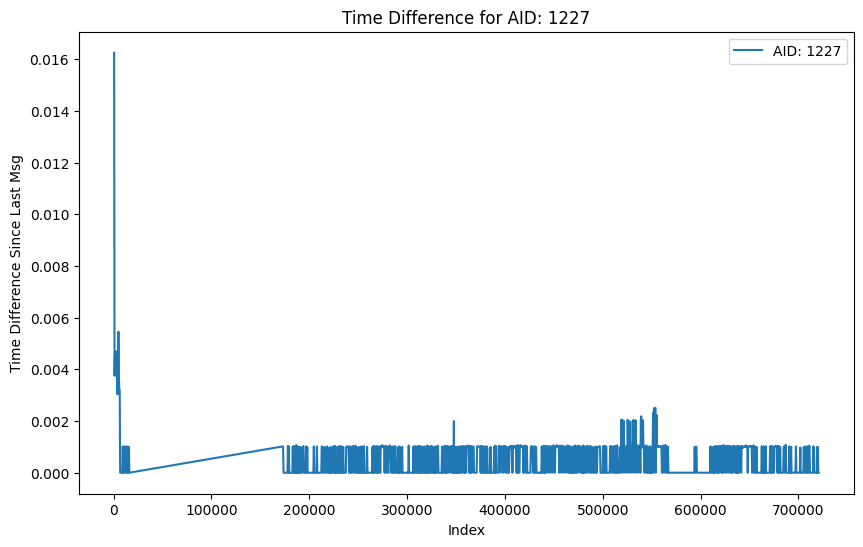

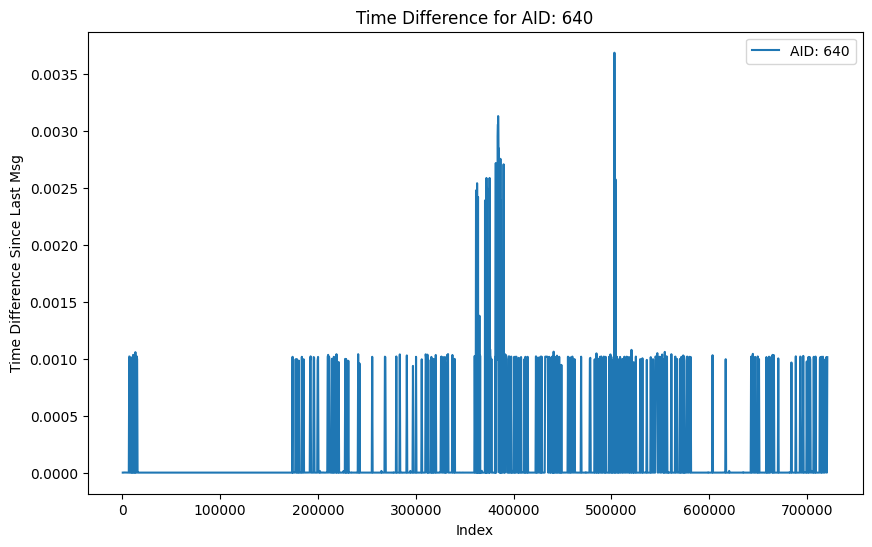

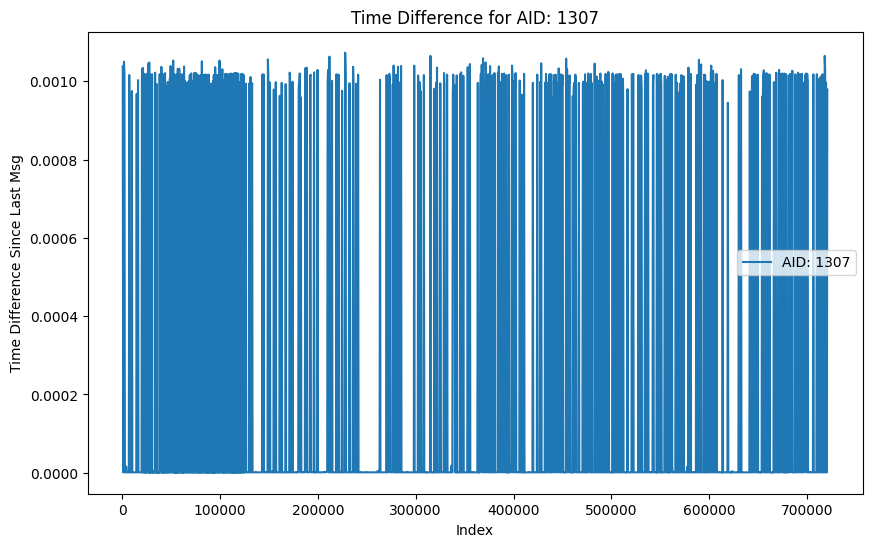

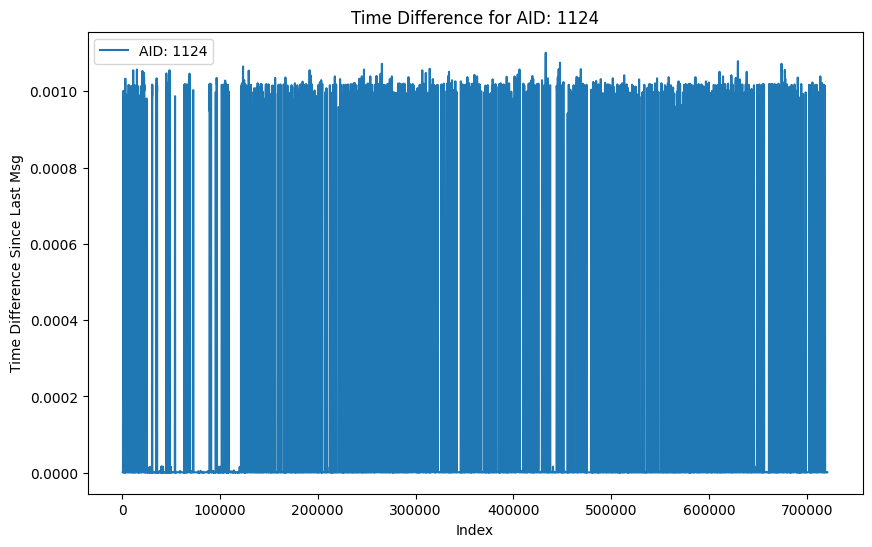

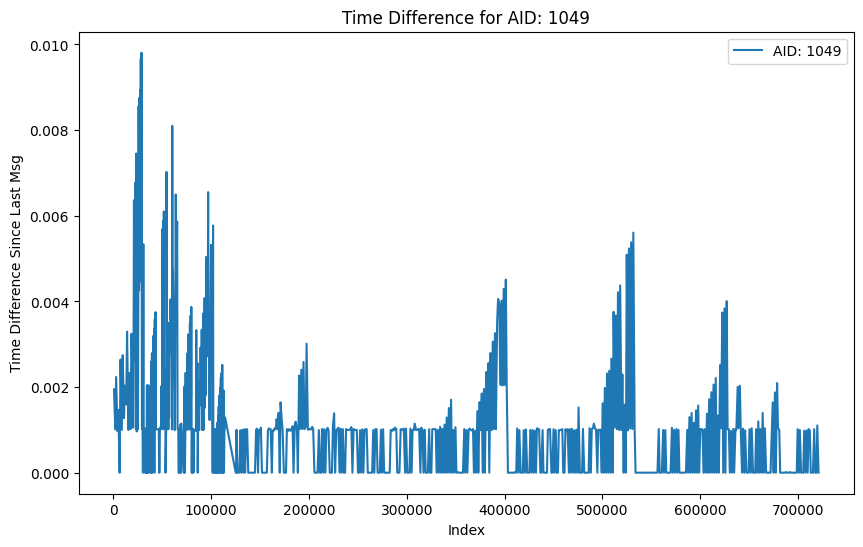

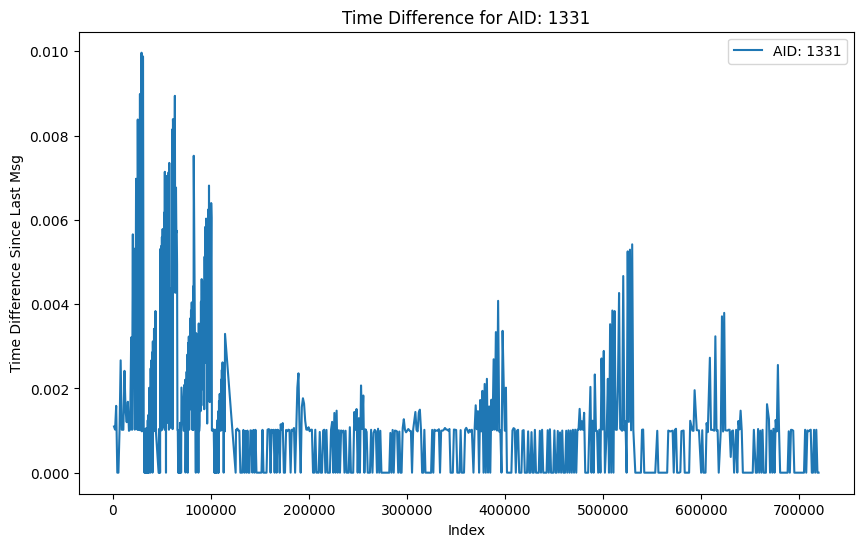

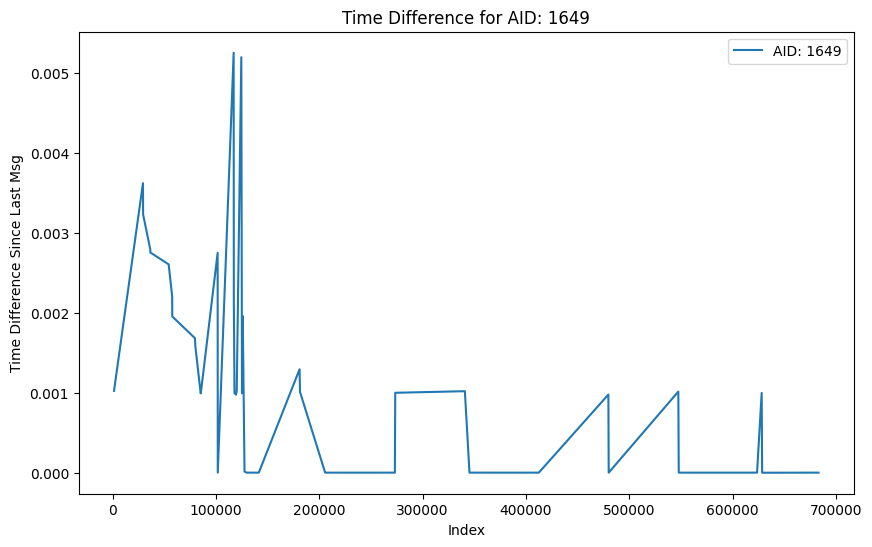

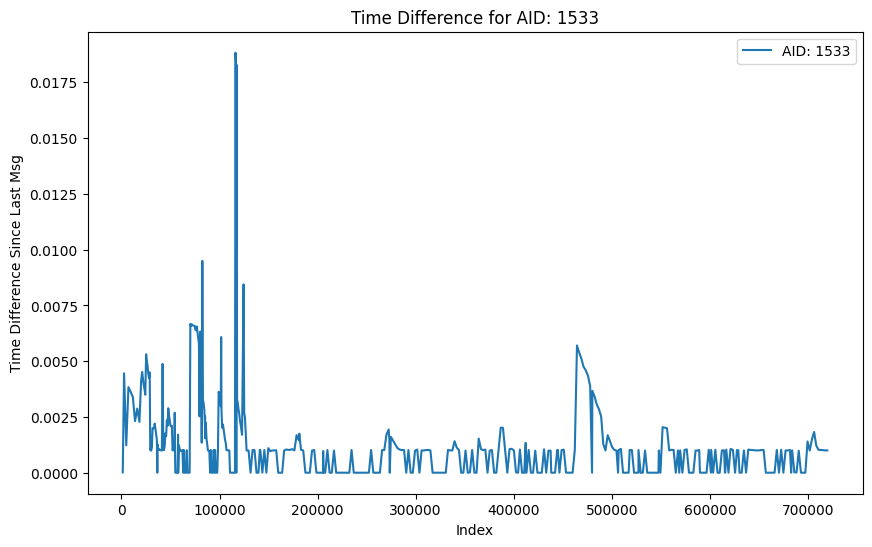

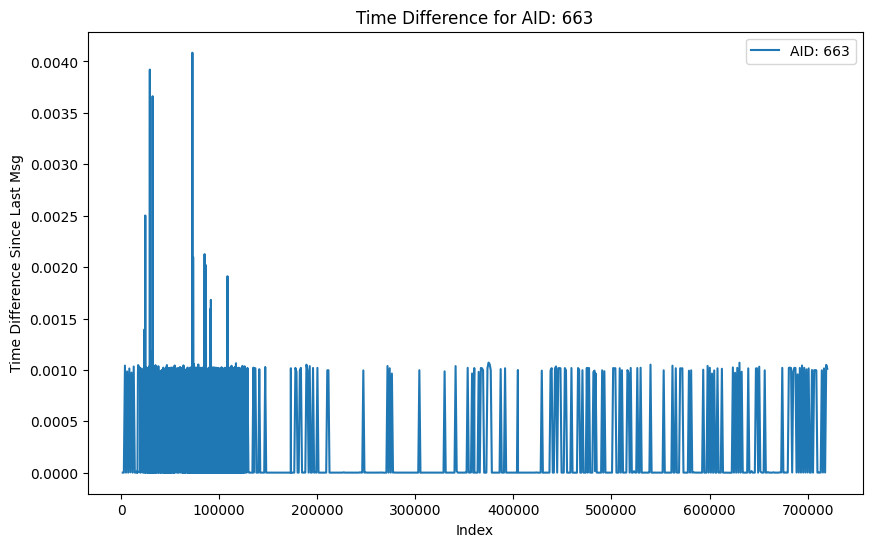

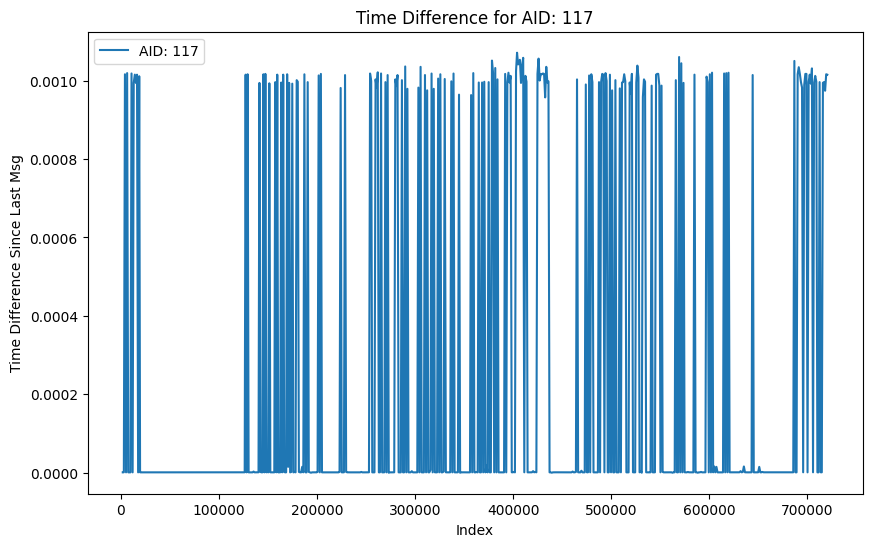

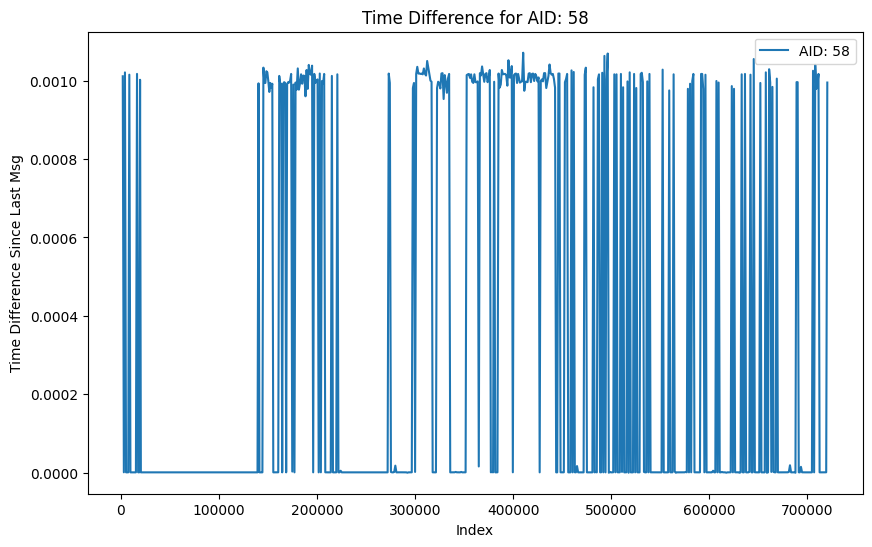

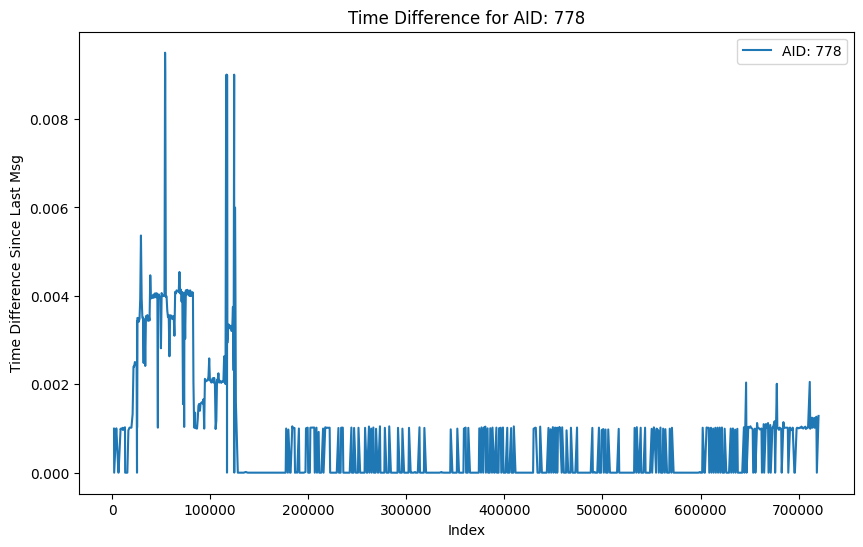

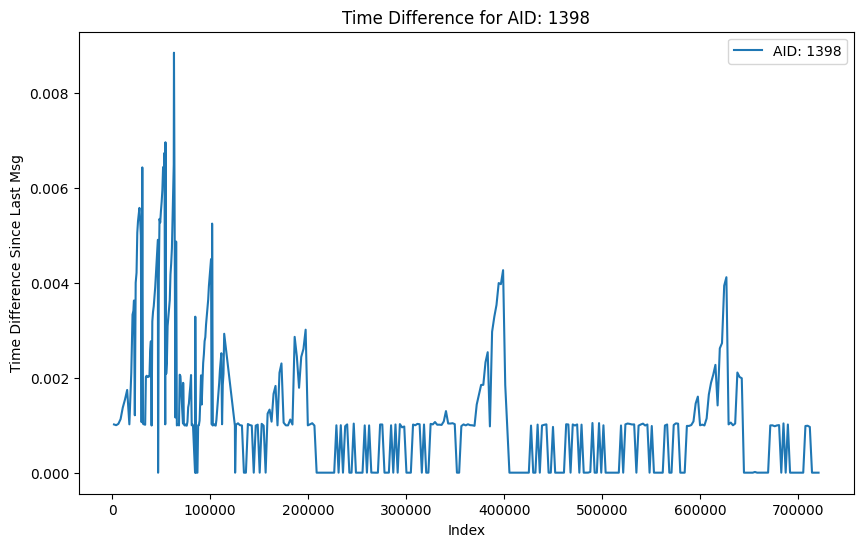

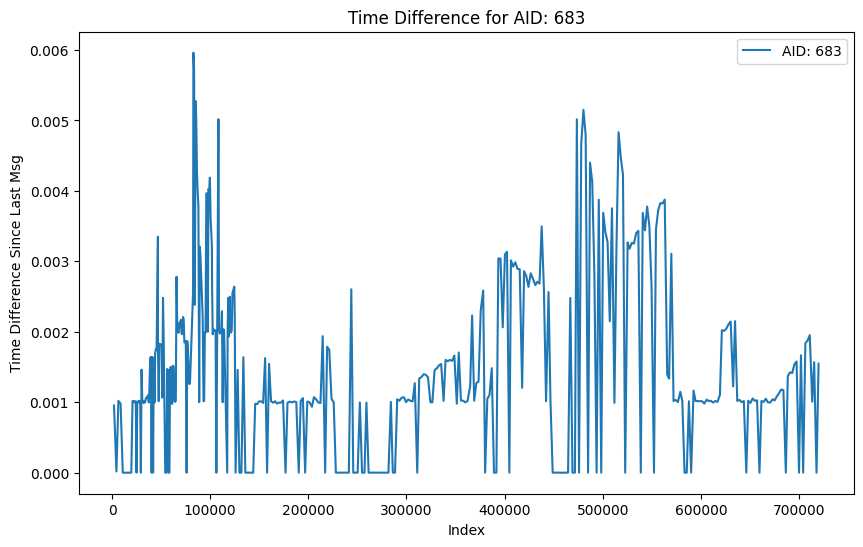

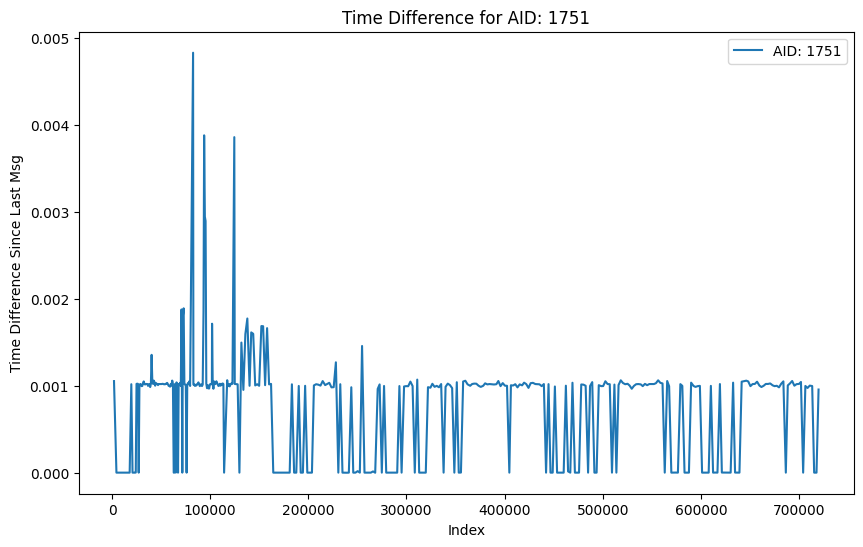

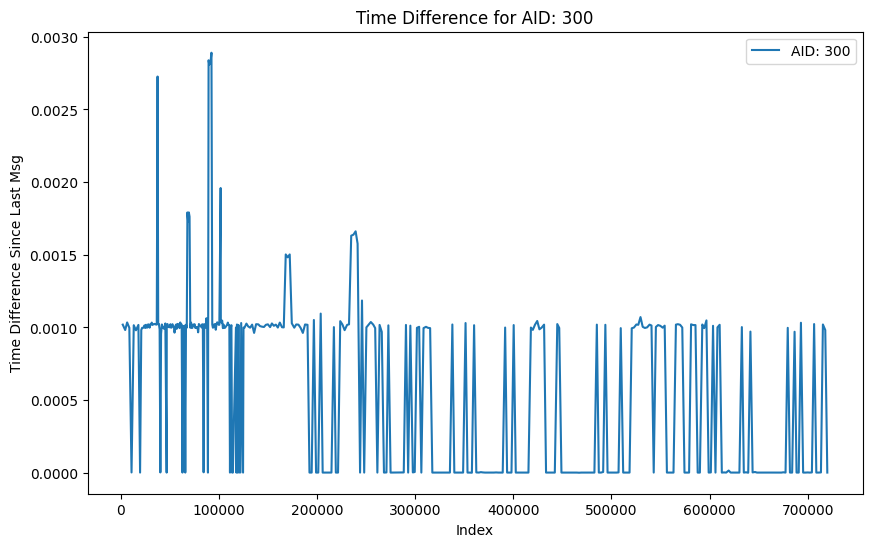

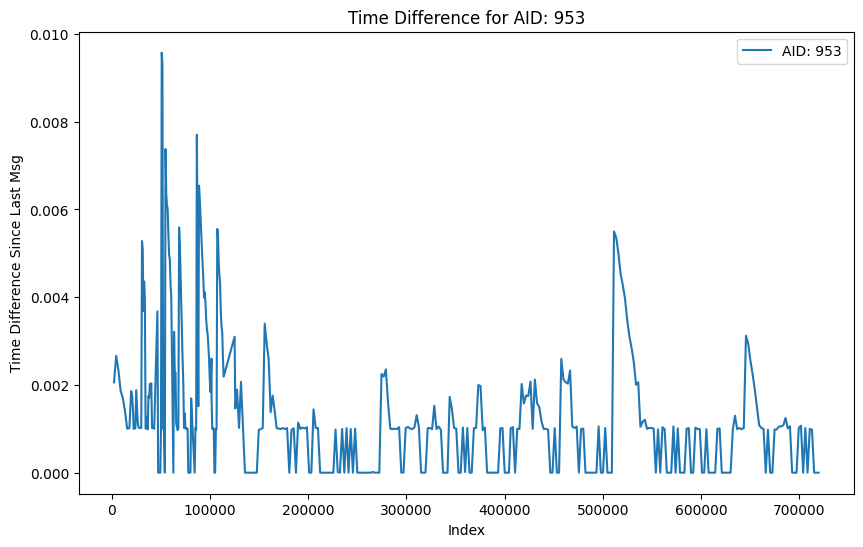

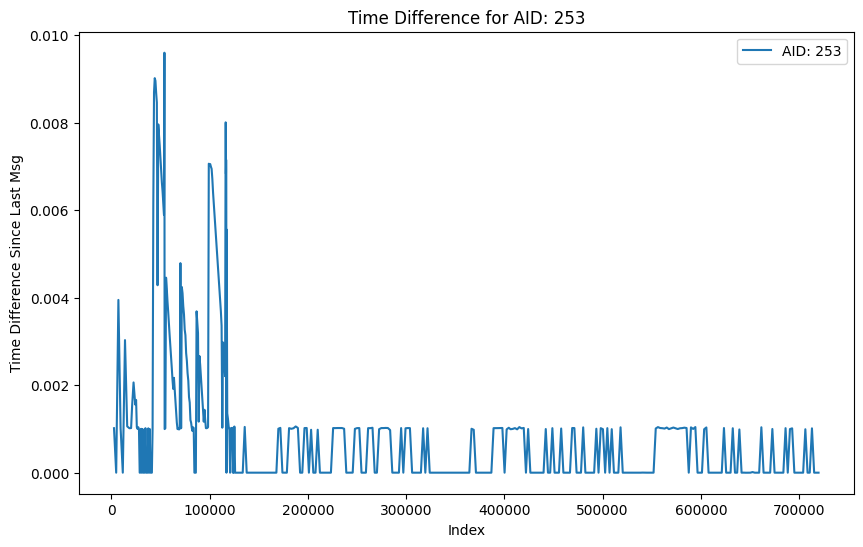

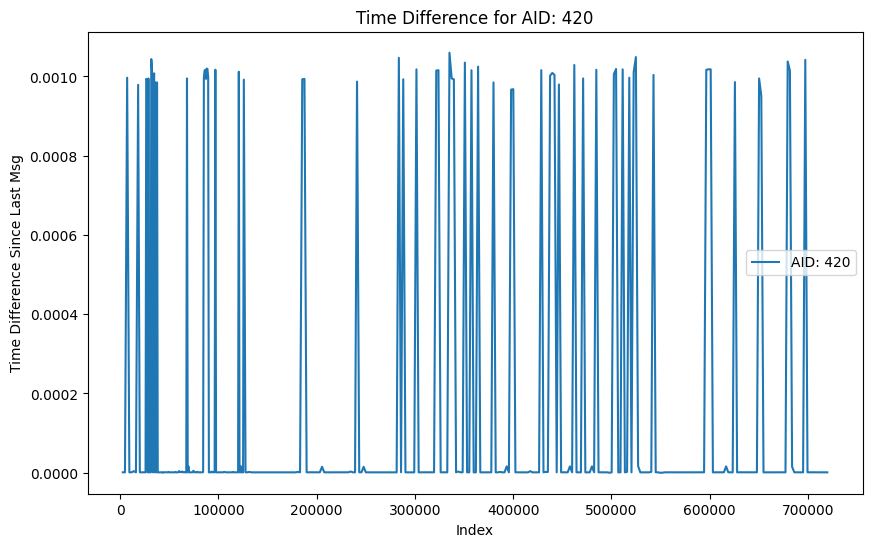

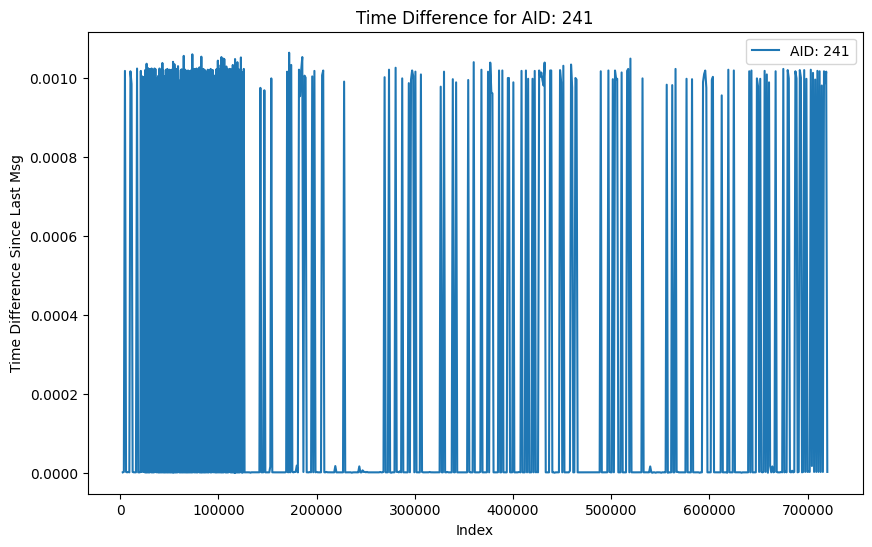

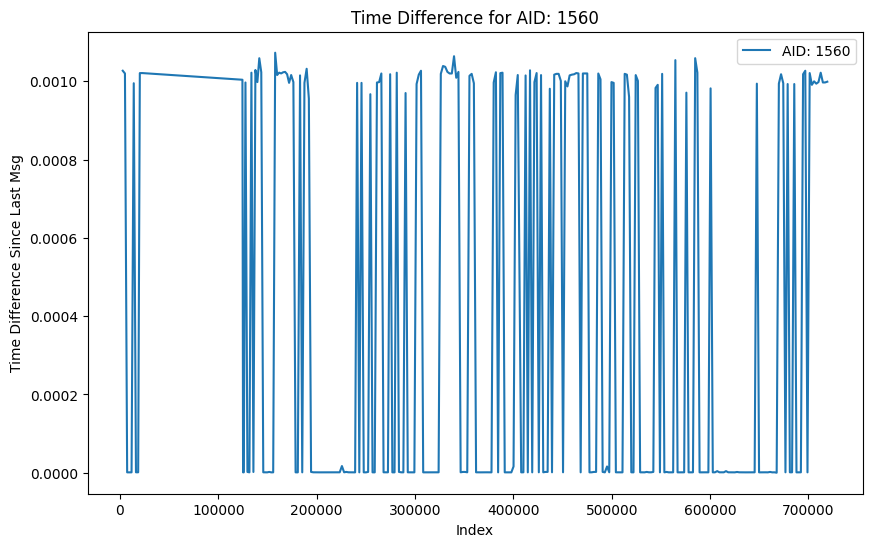

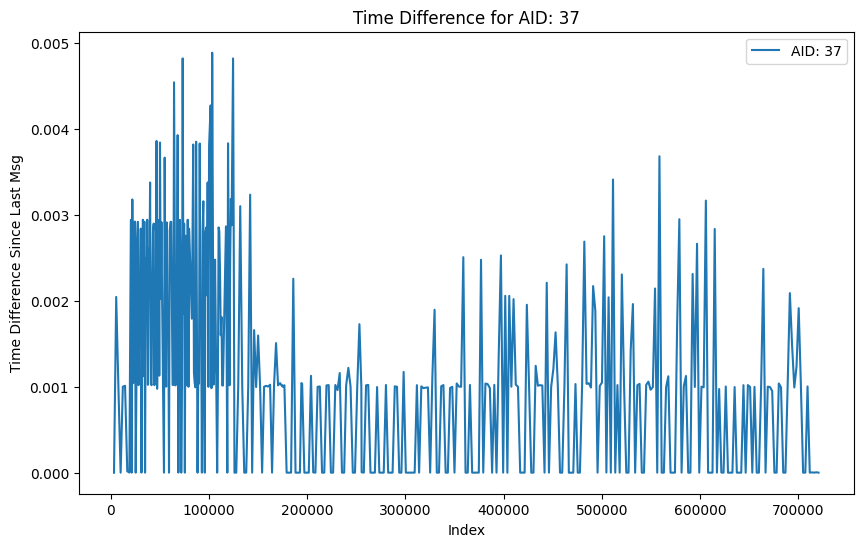

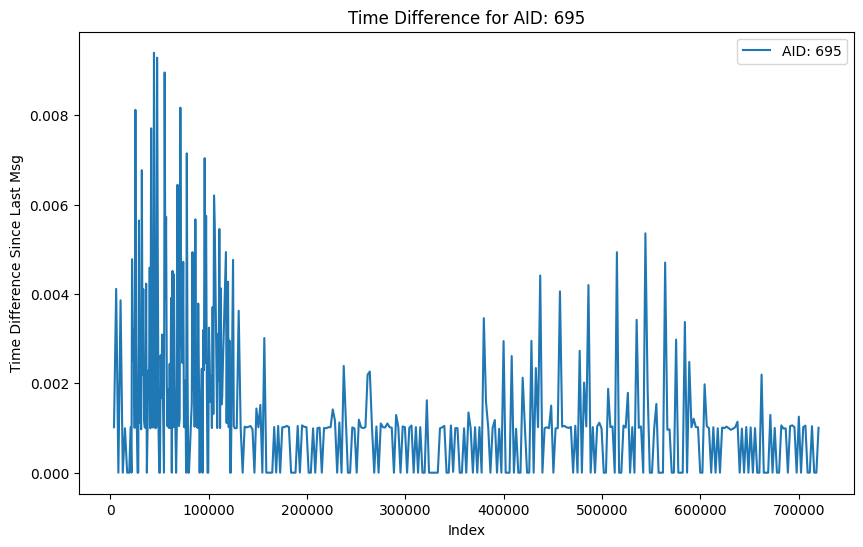

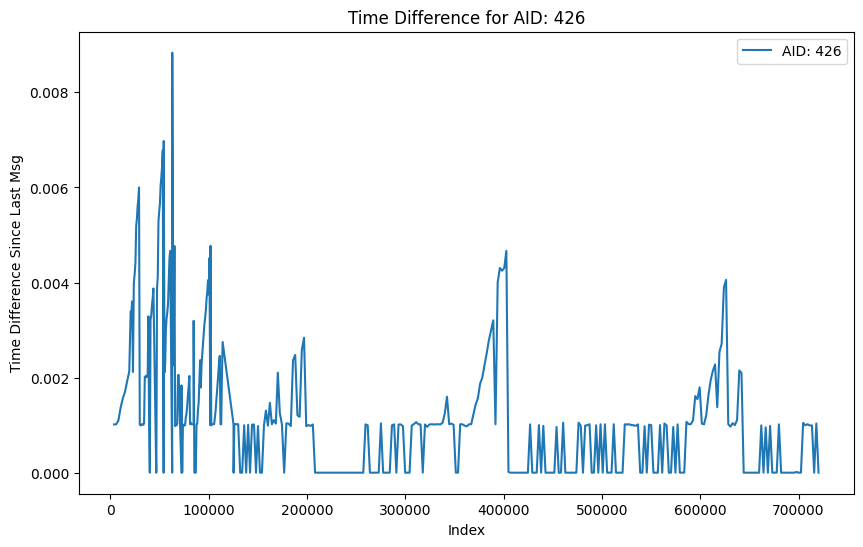

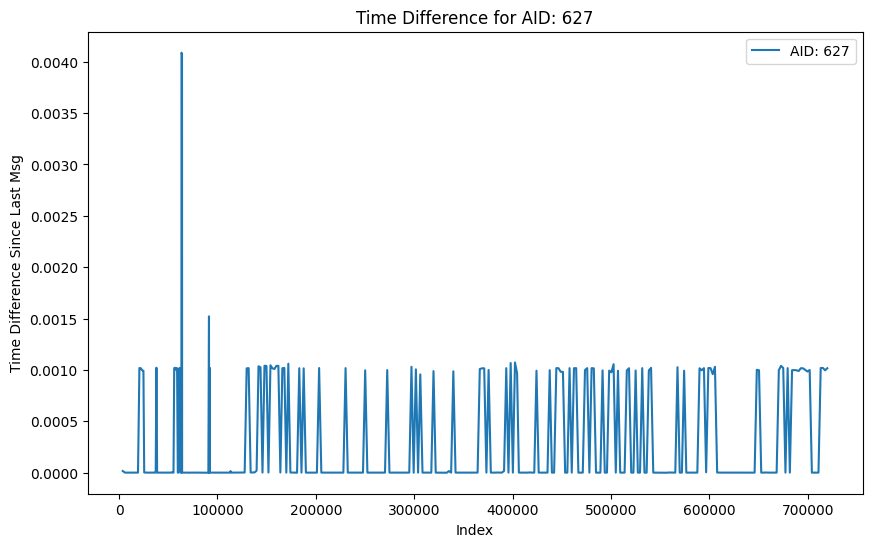

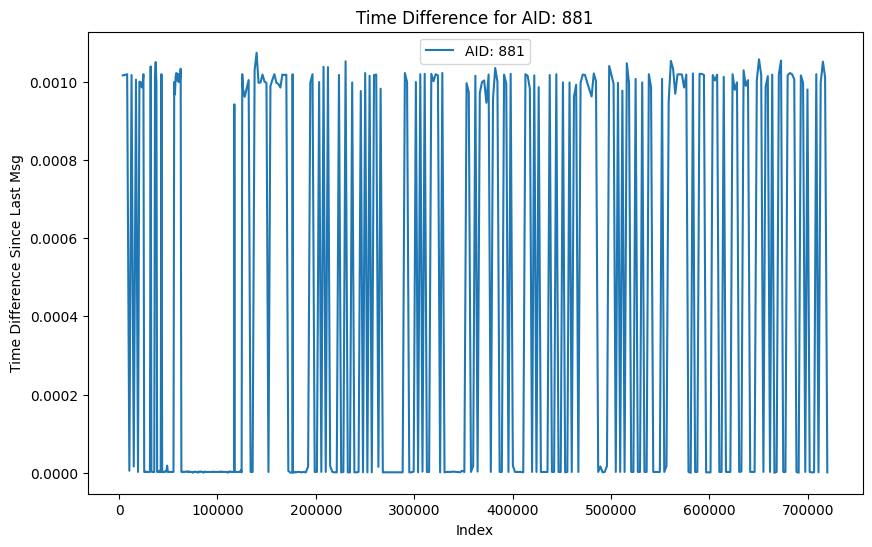

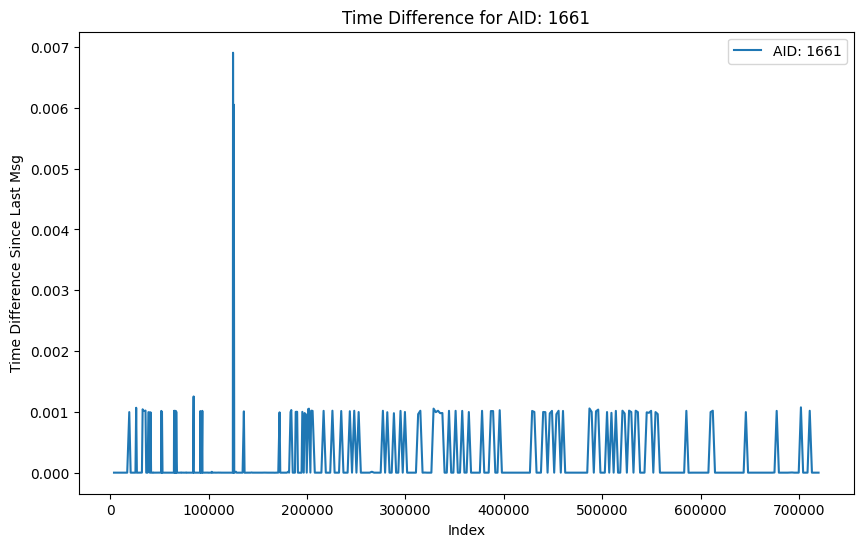

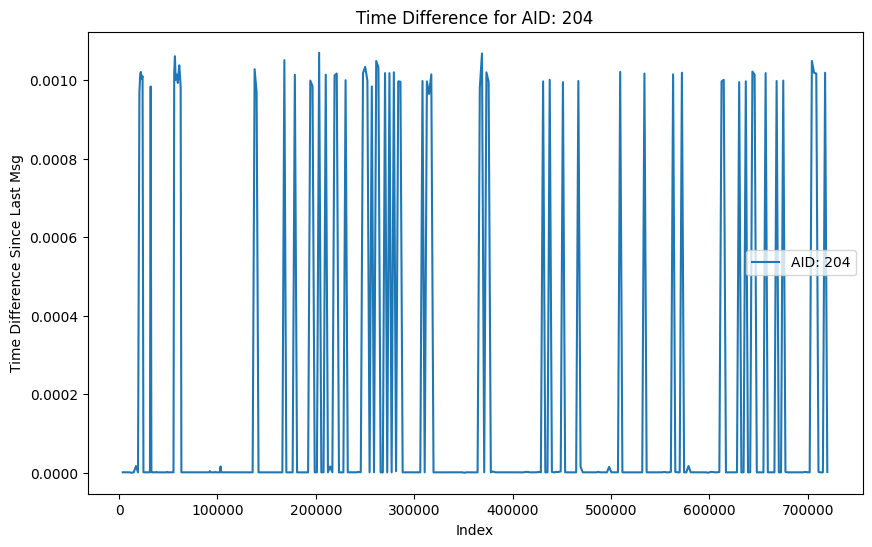

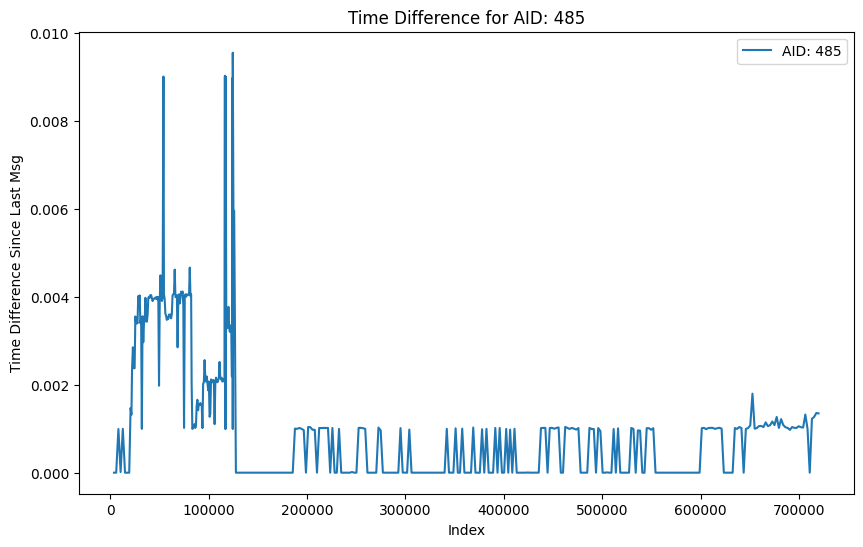

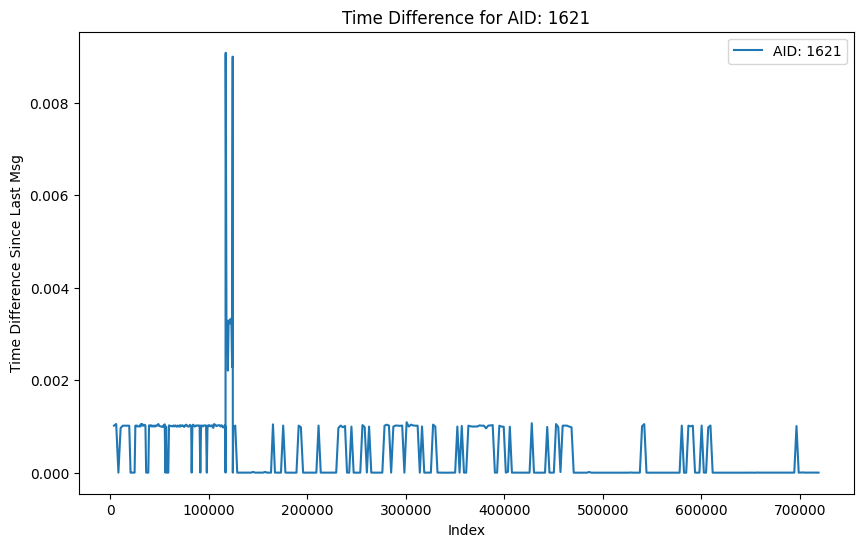

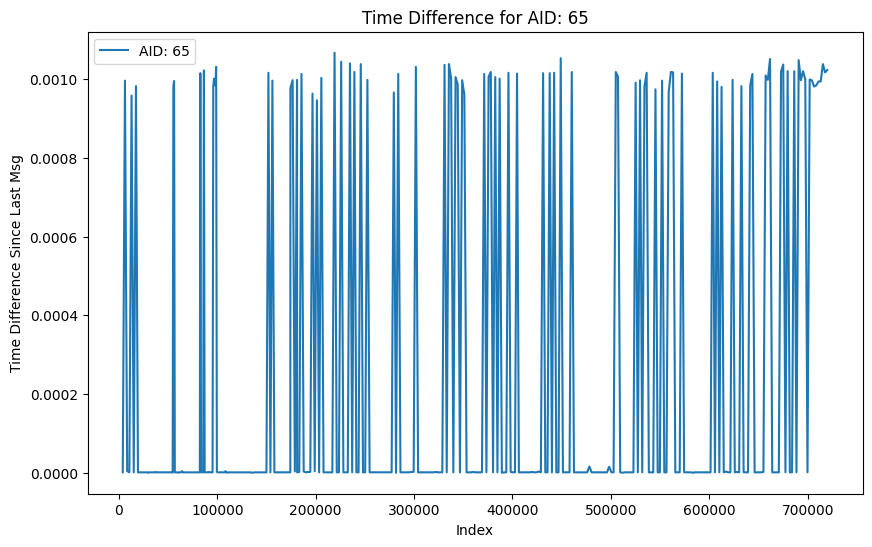

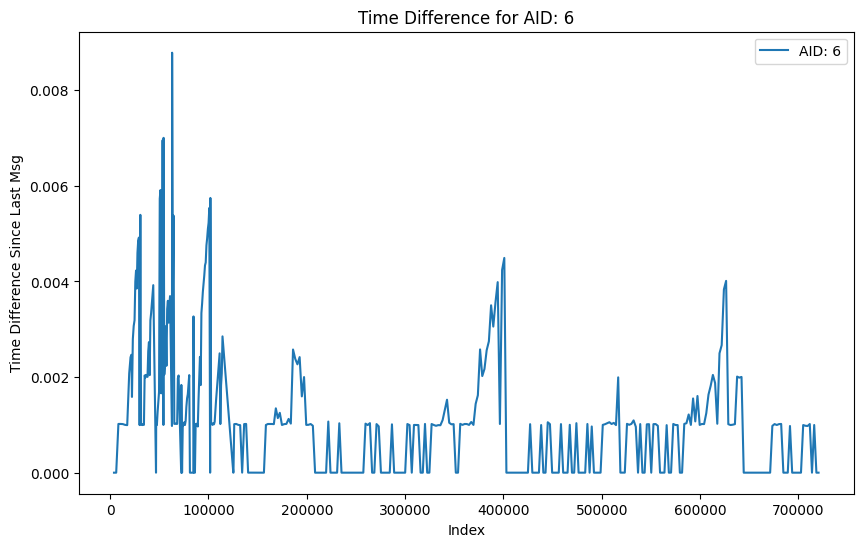

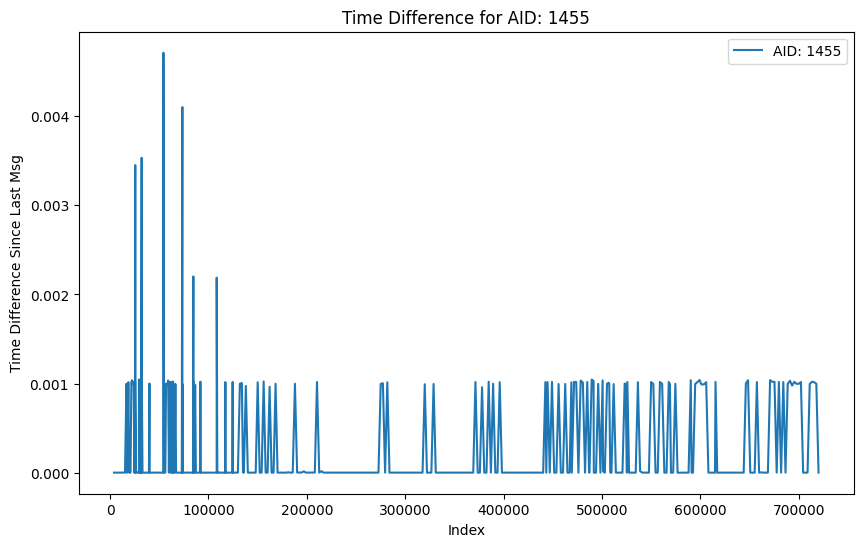

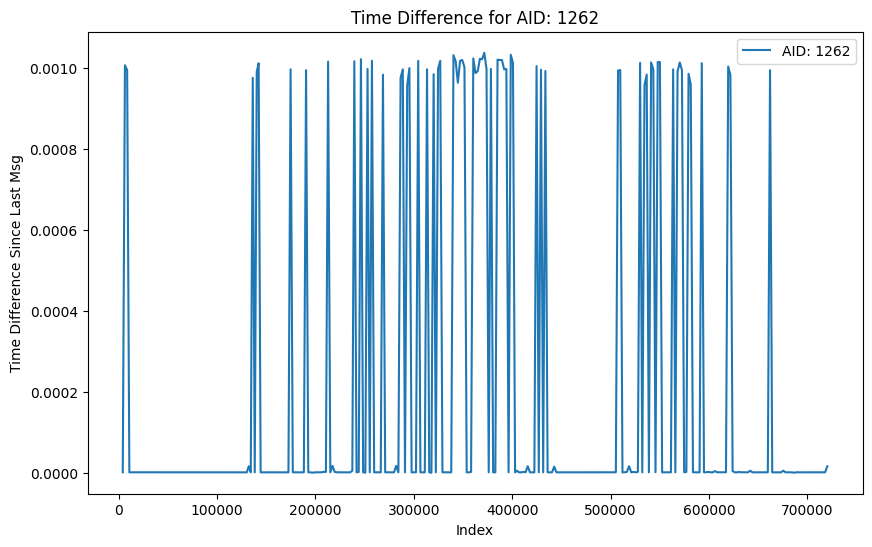

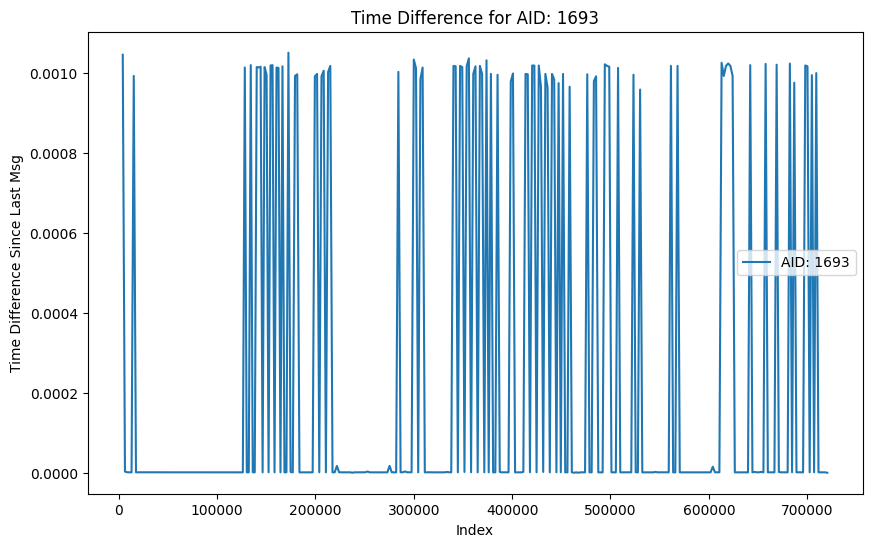

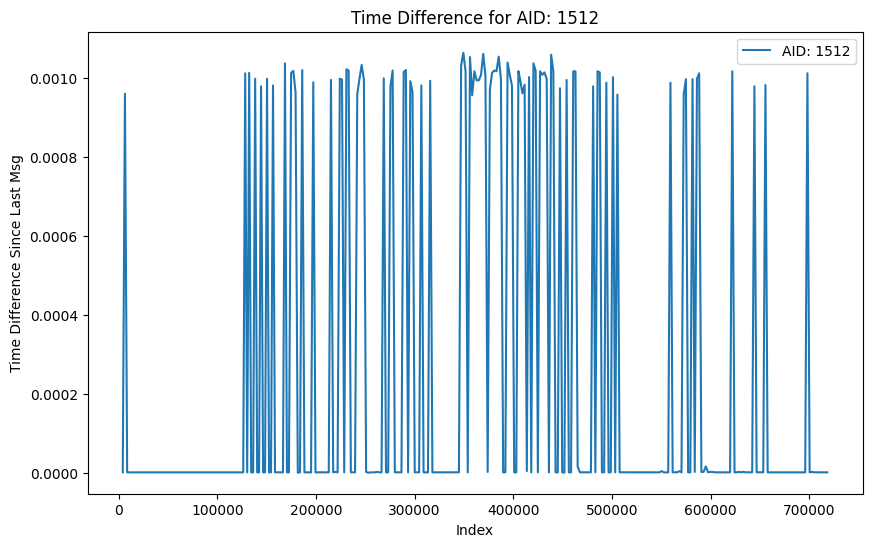

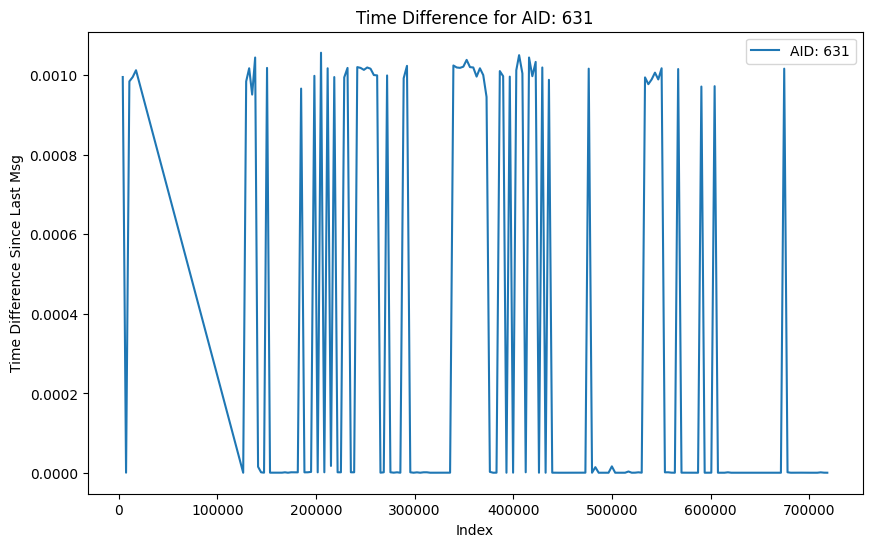

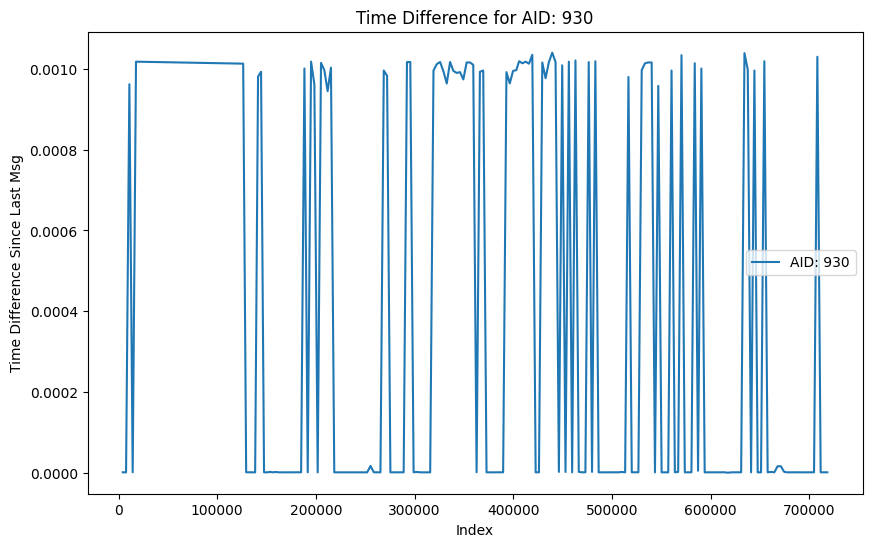

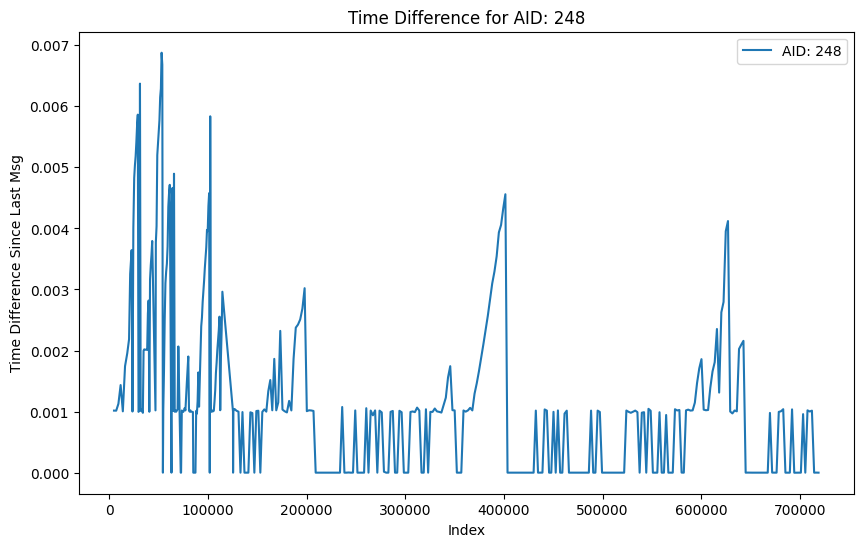

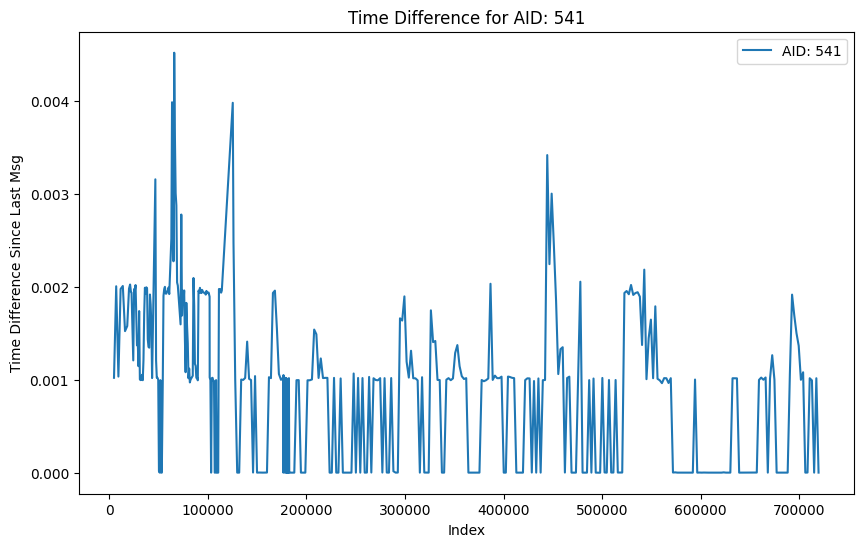

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = ambient_dfs['ambient_dyno_drive_benign_anomaly']

# Task 1: Plot time_diff_since_last_msg vs. index
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['time_diff_since_last_msg'], label='Time Difference')
plt.title('Time Difference vs Index')
plt.xlabel('Index')
plt.ylabel('Time Difference Since Last Msg')
plt.legend()
plt.show()

# Task 2: Plot time_diff_since_last_msg for each AID
unique_aids = df['aid'].unique()

for aid in unique_aids:
    subset_df = df[df['aid'] == aid]
    plt.figure(figsize=(10, 6))
    plt.plot(subset_df.index, subset_df['time_diff_since_last_msg'], label=f'AID: {aid}')
    plt.title(f'Time Difference for AID: {aid}')
    plt.xlabel('Index')
    plt.ylabel('Time Difference Since Last Msg')
    plt.legend()